# Data Visualizaiton with ggplot2 in R

**Author: Trevor Faske  
Modified: 03/16/2021**

Data visualization is a key component to any scientific journal or popular science article. Being able to tell a compelling story using just the data at hand should be the goal of any figure. 

In this primer, we are going to be using the package "ggplot2" in R for graphing purposes. This will get use through the basics with a few various types of figures and how to cleanly modify them for to look a bit better. Josh Jahner will continue this next week, focusing more on the componenets of good figure making practices.

**For this priimer, you will need the *city_df.csv* file**

## ggplot2 - Grammar of graphics

[ggplot2 wiki](https://en.wikipedia.org/wiki/Ggplot2#:~:text=ggplot2%20is%20a%20data%20visualization,such%20as%20scales%20and%20layers.)

ggplot2 is one of the most widely used R packages and graphical programs around (sorry Josh). It breaks everything into *scales* and *layers*, allowing quick manipulaion of complex figure types. While it is very easy to get simple figures made, customization requires a more in-depth understanding of what is happening *under the hood*. Once you understand how to format your data in a manner ggplot works well with, it becomes largely intuitive. 

## Resources: 

Below is a all open-source book and course all on data visualization in R
- https://clauswilke.com/dataviz/
- https://wilkelab.org/SDS375/

R basics for those needing a refresher:
- https://rpubs.com/chalsch/intro_to_R

## Install R and RStudio Desktop

Both these programs are free and open-source. R is the actual program while RStudio is a user-friendly GUI (graphical user interface) to run R. 

- https://www.r-project.org/
- https://rstudio.com/products/rstudio/download/

It is possible to set up an R Jupyter Notebooks but it the interface of RStudio is much more user friendly

## Install R packages

Within R, you will need a few packages: 

- tidyverse: contains ggplot2 and many other useful functions
- ggforce: contains a few useful functions for summarizing
- ggsci: nice color package [(ggcsi website)](https://cran.r-project.org/web/packages/ggsci/vignettes/ggsci.html)
- patchwork: very, very easy figure layout [(patchwork website)](https://gotellilab.github.io/GotelliLabMeetingHacks/NickGotelli/ggplotPatchwork.html)

In [85]:
install.packages(c('tidyverse','ggforce','ggsci','patchwork','Hmisc'))

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘survival’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Wide vs Long data formats

## Understanding your data

For this and the rest of the primer, you will need the **city_df.csv**

city_df.csv can be read in as is and contains various information on the 20 largest cities in WA, OR, CA, NV, and AZ. 

**Variable descriptions:**
- **State:** two-letter abbreviations for the states
- **City:** name of city
- **Lat:** latitude of city
- **Long:** longitude of city
- **Pop:** city population
- **Time:** arbitary time series column 1-20 (simulated for graphical purposes)
- **Growth:** arbitary growth column (simulated for graphical purposes)
- **Ppt:** Annual preciptication using PRISM 30-year normals, 1981-2010
- **Temp:** Annual mean temperature using PRISM 30-year normals, 1981-2010
- **Size:** categorical city size variable based on population (small < 1,000,000 & large > 1,000,000)

In [92]:
#import libraries
library(tidyverse)
library(ggforce) 
library(ggsci)
library(patchwork)
library(Hmisc)

In [2]:
setwd('~/g/DataScience/Data_Science_For_Biology_II/Part.3_DataVisualization/1-ggplot')

In [3]:
city_df <- read.csv('city_df.csv')

look at the structure of the data

In [4]:
str(city_df)

'data.frame':	100 obs. of  10 variables:
 $ State : Factor w/ 5 levels "AZ","CA","NV",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ City  : Factor w/ 100 levels "Albany","Aloha",..: 66 22 73 50 10 33 35 7 19 84 ...
 $ Lat   : num  45.5 44.1 44.9 42.3 44.1 ...
 $ Long  : num  -123 -123 -123 -123 -121 ...
 $ Pop   : int  2074775 273439 266804 170876 109802 109381 109128 99037 67467 63230 ...
 $ Time  : int  20 19 18 17 16 15 14 13 12 11 ...
 $ Growth: num  11820 10865 9689 8430 7556 ...
 $ Ppt   : num  1104 1137 1009 509 293 ...
 $ Temp  : num  11.92 11.35 11.67 12.12 8.12 ...
 $ Size  : Factor w/ 2 levels "large","small": 1 2 2 2 2 2 2 2 2 2 ...


Factors are a special case variable in R that can be very helpful and also, create a huge headache. If you are getting an error in R, factor is probably the first thing you should be checking. 

Let's look under the hood of the *State* factor... 

From the above structure view, you can see that *State* contains 5 total levels. If we look state *as.character()* variable, you will see just the state id. 

In [9]:
as.character(city_df$State)

[1] "OR" "OR" "OR" "OR" "OR" "OR" "OR" "OR" "OR" "OR" "OR" "OR" "OR" "OR" "OR"
 [16] "OR" "OR" "OR" "OR" "OR" "NV" "NV" "NV" "NV" "NV" "NV" "NV" "NV" "NV" "NV"
 [31] "NV" "NV" "NV" "NV" "NV" "NV" "NV" "NV" "NV" "NV" "WA" "WA" "WA" "WA" "WA"
 [46] "WA" "WA" "WA" "WA" "WA" "WA" "WA" "WA" "WA" "WA" "WA" "WA" "WA" "WA" "WA"
 [61] "CA" "CA" "CA" "CA" "CA" "CA" "CA" "CA" "CA" "CA" "CA" "CA" "CA" "CA" "CA"
 [76] "CA" "CA" "CA" "CA" "CA" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ"
 [91] "AZ" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ" "AZ"

But if we look more closely as the factors and treat them *as.numeric()*, will see the what the factor designation is doing

In [10]:
as.numeric(city_df$State)

[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

**factors code discrete variables with numbers ordered alphabetically**

This is very important and will come in use later with more complex figure making

## Basics of ggplot layout 

**aesthetics or aes()**  
ggplot maps variable to what is known as *aesthetics* or aes(). Within the aesthetics you will be assigning elements of your plot such as position (x,y), color, fill, shape, and size. These will be automatically adjusted based on your data. 

For example, within city_df we want to plot Time vs. Growth:

`ggplot(data=city_df,aes(x=Time,y=Growth))`

This will set up the plot with the basic form but we need to tell ggplot how we want to plot it.

**layers**  
ggplot also work with *layers*, meaning it will build on itself in a layered/sequential manner. Let's make some basic scatterplots with city_df to see. 

## Scatter / Line plot  - continuous vs continuous

**Functions**
- **geom_point():** adds points
- **geom_line():** adds lines
- **stat_smooth:** adds various trendlines

#### basic scatter plot

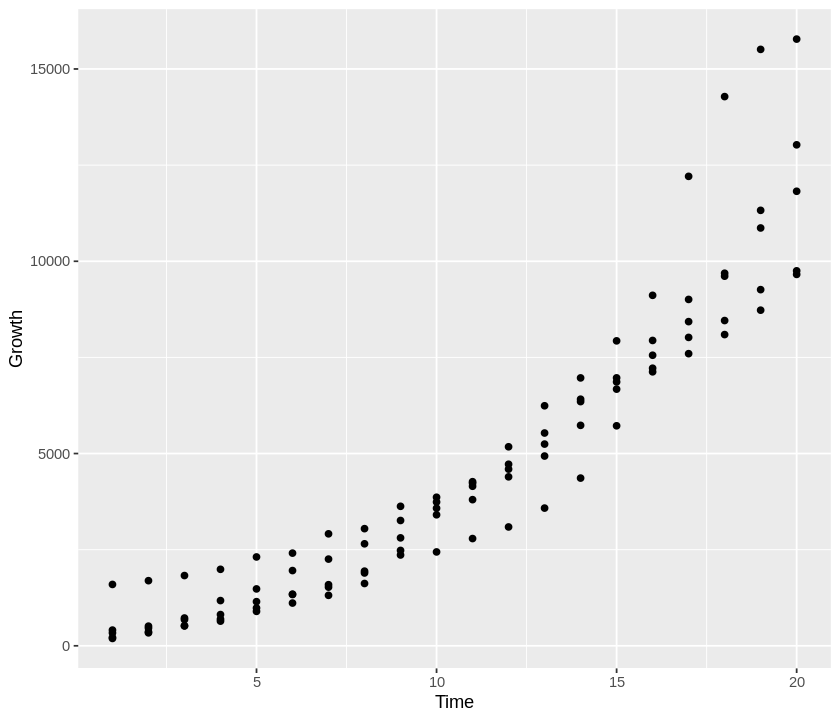

In [18]:
ggplot(data=city_df,aes(x=Time,y=Growth)) + 
geom_point()

**scatter plot but lets add colors for each state**

ggplot is really smart, if you tell it the right things. It will automatically group things based off the structure or factor in your dataset and pick colors already for you.

We will do this in the aes() in the top layer so it stays throughout the rest of the figure. Notice how it sorts alphabetically because of the factor

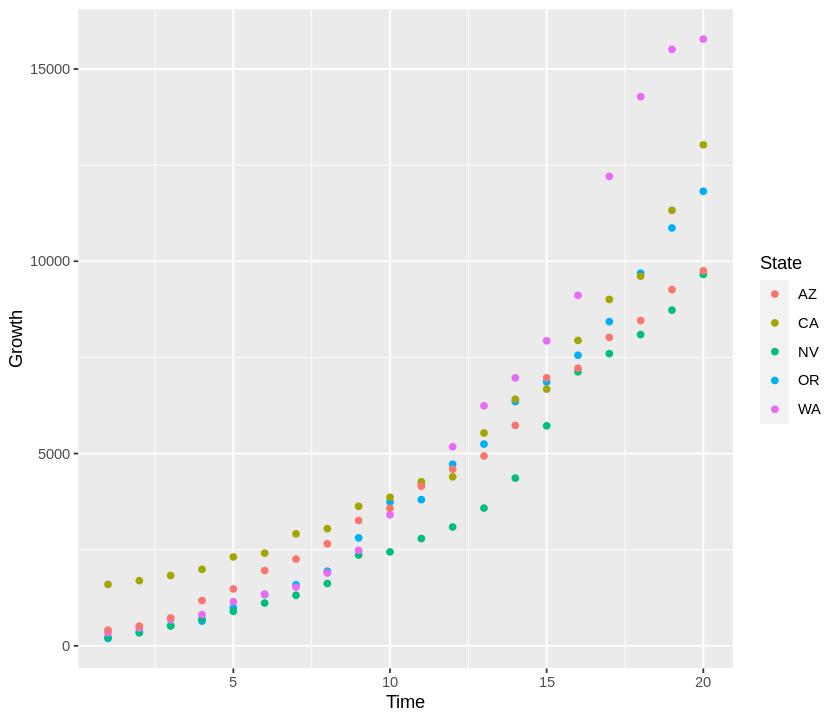

In [20]:
ggplot(data=city_df,aes(x=Time,y=Growth,color=State)) + 
geom_point()

**add line for each state** 

ggplot already knows we want to group based on state because we said so in the top layer, so we just add a line

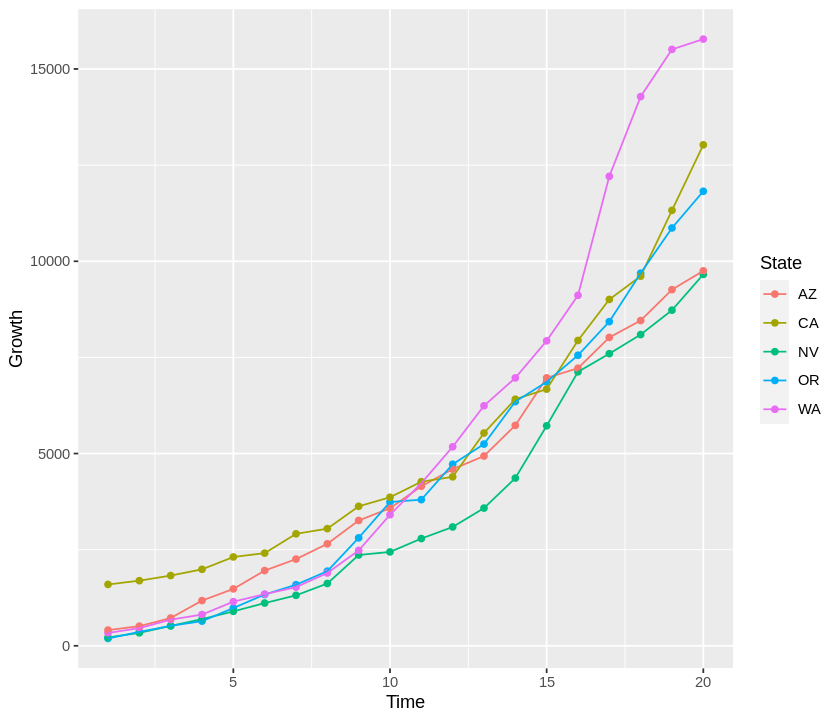

In [21]:
ggplot(data=city_df,aes(x=Time,y=Growth,color=State)) + 
geom_point() + 
geom_line()

**add a trend line instead of a line between each point** 

stat_smooth common options: 
- method = "": chooses the type of model to run to get trend line (loess,lm,etc.)
- se = TRUE: standard error background based off 95% bootstrapped confidence inteval

Google for the rest of the options

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



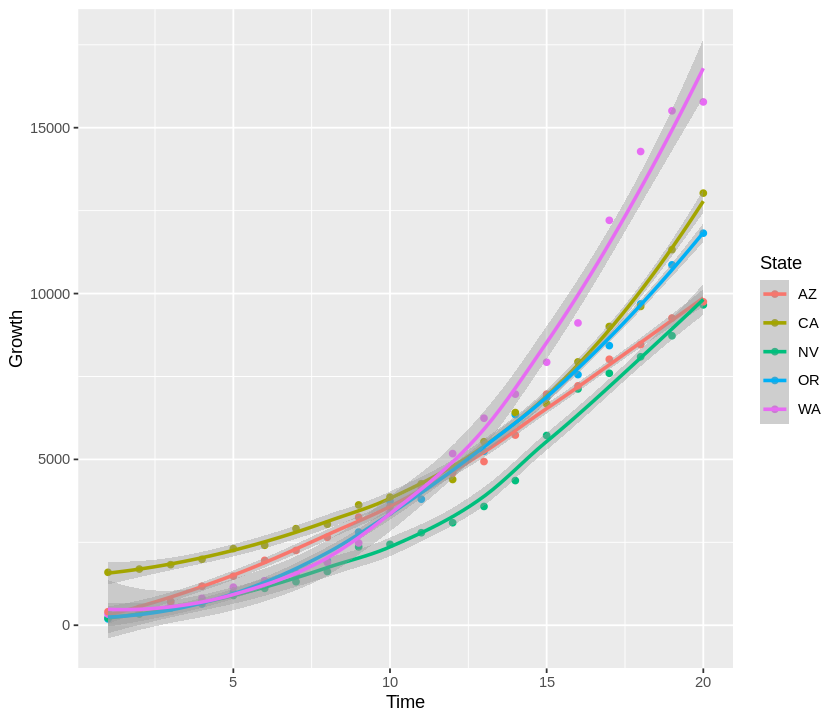

In [23]:
ggplot(data=city_df,aes(x=Time,y=Growth,colour=State)) + 
geom_point() + 
stat_smooth()

**Let's get a trend line for the entire model, instead of each state BUT keep state colours.**

*hint: remember the layering*

We can do this by confining the colour aesthetic within geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



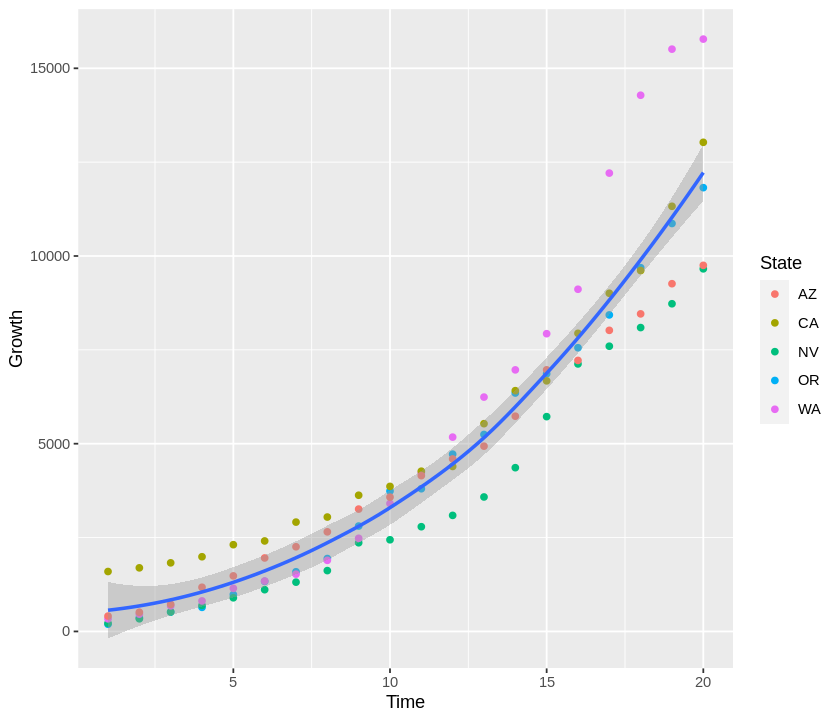

In [24]:
ggplot(data=city_df,aes(x=Time,y=Growth)) + 
geom_point(aes(colour=State)) + 
stat_smooth()

**Change the size and colour and linetype of things independently to make things look a little nicer**

Remember, ordering matters. Sometimes it might be nice for lines to be behind points, that is up to you. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



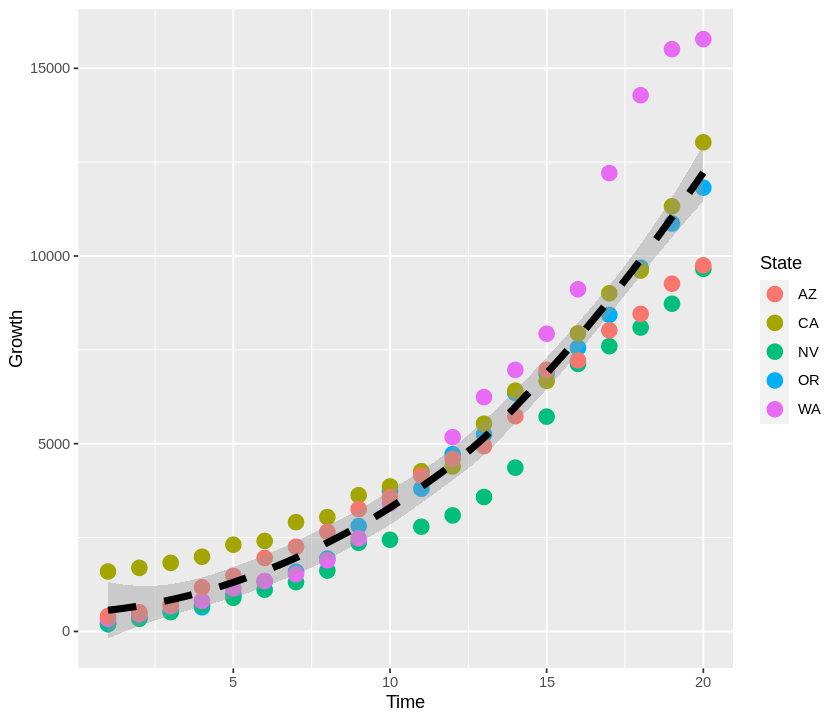

In [25]:
ggplot(data=city_df,aes(x=Time,y=Growth)) + 
geom_point(aes(colour=State),size=4) + 
stat_smooth(linetype='dashed',colour='black',size=2)

**Add a shape for population Size**

It automatically picks shapes for you based off factors and puts it in the legend. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



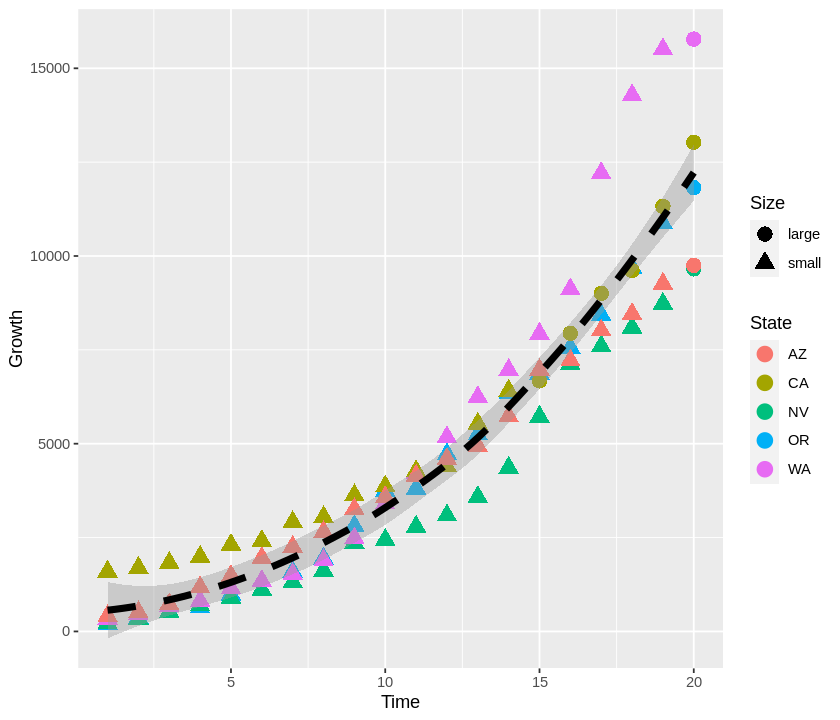

In [26]:
ggplot(data=city_df,aes(x=Time,y=Growth)) + 
geom_point(aes(colour=State,shape=Size),size=4) + 
stat_smooth(linetype='dashed',colour='black',size=2)

### repurposing code for similiar figures

If you find a format you like, just use it as a template and change variables around.

Lets make figures for: 
- Lat vs. Ppt
- Lat vs. Temp 
- Temp vs. Ppt

Let's also pick a linear trend line over a curved loess

`geom_smooth()` using formula 'y ~ x'



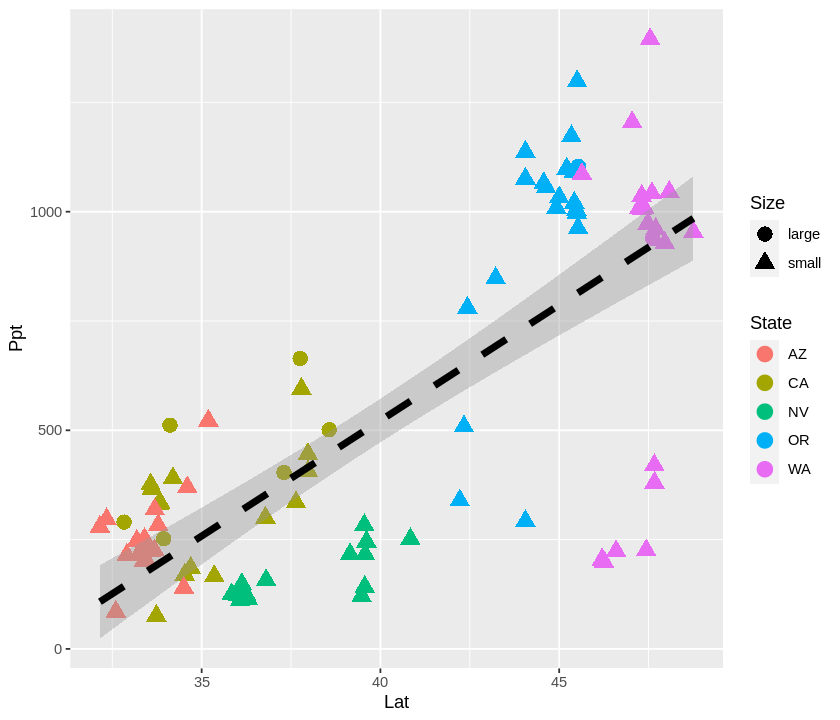

In [28]:
#lat vs Ppt
ggplot(data=city_df,aes(x=Lat,y=Ppt)) + 
geom_point(aes(colour=State,shape=Size),size=4) + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2)

`geom_smooth()` using formula 'y ~ x'



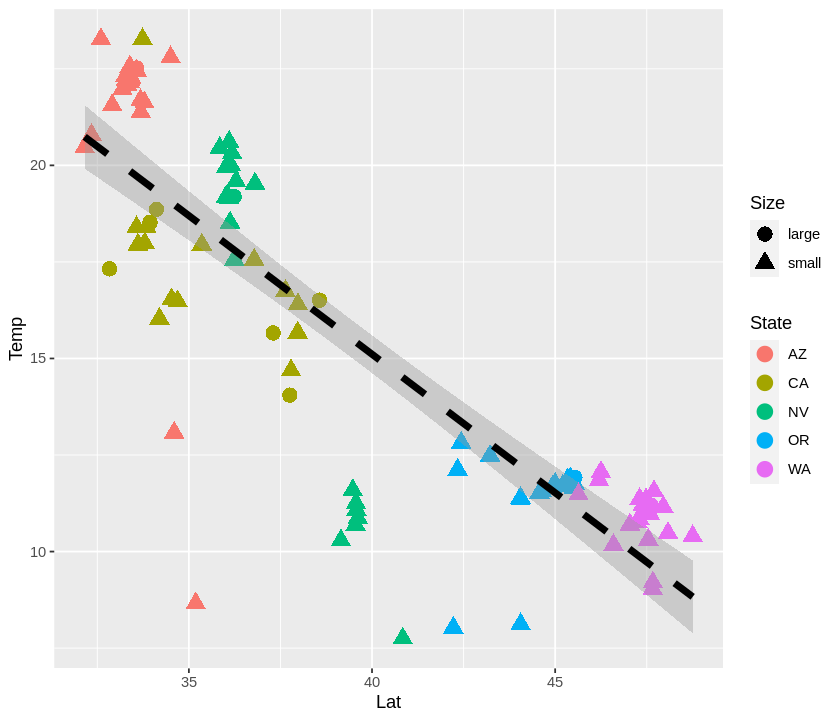

In [29]:
#lat vs Temp
ggplot(data=city_df,aes(x=Lat,y=Temp)) + 
geom_point(aes(colour=State,shape=Size),size=4) + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2)

`geom_smooth()` using formula 'y ~ x'



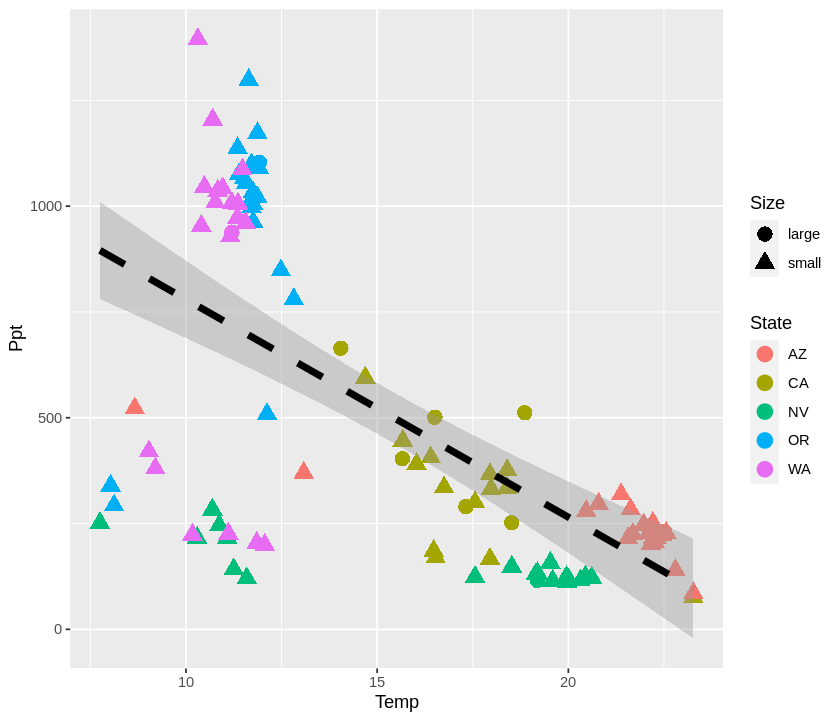

In [30]:
#Temp vs Ppt
ggplot(data=city_df,aes(x=Temp,y=Ppt)) + 
geom_point(aes(colour=State,shape=Size),size=4) + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2)

## Categorical Variables in figures

Let's try some various plots using categorical predictors and a continuous response. 

**Basic functions**
- **geom_bar():** adds bars
- **geom_point():** adds points
- **geom_error():** adds errorbars
- **geom_boxblot():** adds boxplot
- **geom_violin():** adds violin plot
- **geom_density():** adds density plot

**Fancy functions**
- **stat_summary():** summarizes and plots data
- **geom_sina():** in *ggforce* libray, plots raw in violin/density shape

**more aesthestic functions**
- **facet_wrap():** creates panels for different variables 

If we are going to be using the base functions, we must first summarize the data in a meaningful way (mean, sd, N, 95% CI). Let's plot Ppt and Temp by state

In [36]:
city_sum_df <- city_df %>%
  group_by(State) %>%
  summarise(Temp_mean = mean(Temp, na.rm = TRUE), #temp mean
            Temp_sd = sd(Temp, na.rm = TRUE), #temp standard deviation
            Temp_n = n(), #temp count
            Ppt_mean = mean(Ppt, na.rm = TRUE), #Ppt mean
            Ppt_sd = sd(Ppt, na.rm = TRUE),  #Ppt standard deviation
            Ppt_n = n()) %>% #Ppt count 
  mutate(Temp_se = Temp_sd / sqrt(Temp_n), #Temp standard error
         Temp_lower.ci = Temp_mean - qt(1 - (0.05 / 2), Temp_n - 1) * Temp_se, #Temp lower 95% confidence interval
         Temp_upper.ci = Temp_mean + qt(1 - (0.05 / 2), Temp_n - 1) * Temp_se, #Temp upper 95% confidence interval
         Ppt_se = Ppt_sd / sqrt(Ppt_n), #Ppt standard error
         Ppt_lower.ci = Ppt_mean - qt(1 - (0.05 / 2), Ppt_n - 1) * Ppt_se, #Ppt lower 95% confidence interval
         Ppt_upper.ci = Ppt_mean + qt(1 - (0.05 / 2), Ppt_n - 1) * Ppt_se) #Ppt upper 95% confidence interval

In [37]:
city_sum_df

State,Temp_mean,Temp_sd,Temp_n,Ppt_mean,Ppt_sd,Ppt_n,Temp_se,Temp_lower.ci,Temp_upper.ci,Ppt_se,Ppt_lower.ci,Ppt_upper.ci
<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AZ,20.9035,3.5645746,20,249.2125,87.97555,20,0.7970631,19.23523,22.57177,19.67193,208.0387,290.3863
CA,17.2490,1.9282142,20,355.1195,146.87497,20,0.4311618,16.34657,18.15143,32.84224,286.3799,423.8591
NV,16.3785,4.5316425,20,155.6960,54.21849,20,1.0133061,14.25763,18.49937,12.12362,130.3210,181.0710
OR,11.4490,1.2028646,20,944.6590,268.55527,20,0.2689687,10.88604,12.01196,60.05078,818.9713,1070.3467
WA,10.8590,0.7763607,20,812.0365,377.88198,20,0.1735995,10.49565,11.22235,84.49698,635.1823,988.8907


### Uh oh, what if we want to put this all on the same figure... We have a wide vs long error, let's fix it 

In [66]:
Temp_sum_df <- city_df %>%
  group_by(State) %>%
  summarise(mean = mean(Temp, na.rm = TRUE), #temp mean
            sd = sd(Temp, na.rm = TRUE), #temp standard deviation
            n = n()) %>% #temp count
  mutate(se = sd / sqrt(n), #Temp standard error
         ci = 1.96 * se) #Temp 95% confidence interval

Temp_sum_df$Clim <- 'Temp'

In [68]:
Ppt_sum_df <- city_df %>%
  group_by(State) %>%
  summarise(mean = mean(Ppt, na.rm = TRUE), #Ppt mean
            sd = sd(Ppt, na.rm = TRUE), #Ppt standard deviation
            n = n()) %>% #Ppt count
  mutate(se = sd / sqrt(n), #Ppt standard error
         ci = 1.96*se) #Ppt 95% confidence interval

Ppt_sum_df$Clim <- 'Ppt'

In [69]:
city_sum_df <- rbind(Temp_sum_df,Ppt_sum_df)
city_sum_df

State,mean,sd,n,se,ci,Clim
<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
AZ,20.9035,3.5645746,20,0.7970631,1.5622437,Temp
CA,17.2490,1.9282142,20,0.4311618,0.8450771,Temp
NV,16.3785,4.5316425,20,1.0133061,1.9860799,Temp
OR,11.4490,1.2028646,20,0.2689687,0.5271786,Temp
WA,10.8590,0.7763607,20,0.1735995,0.3402551,Temp
AZ,249.2125,87.9755509,20,19.6719312,38.5569852,Ppt
CA,355.1195,146.8749727,20,32.8422423,64.3707949,Ppt
NV,155.6960,54.2184942,20,12.1236239,23.7623028,Ppt
OR,944.6590,268.5552733,20,60.0507847,117.6995380,Ppt


**Much better, lets make a bar chart now**

We much identify the stat with in geom_bar to be 'identity' as the default is to be counts (like a histogram)

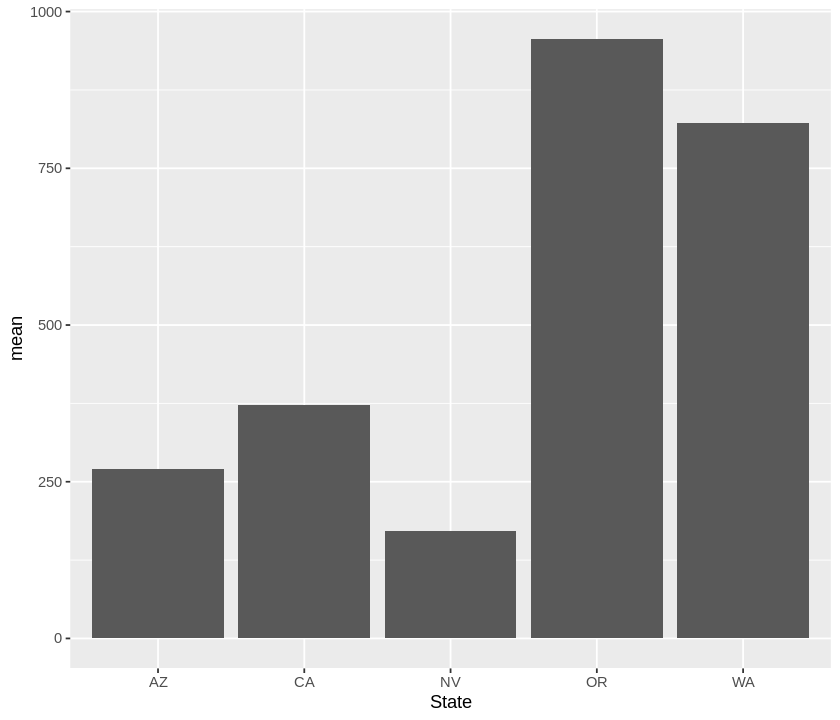

In [44]:
ggplot(data=city_sum_df,aes(x=State,y=mean)) +
geom_bar(stat='identity') 

**but wait, we have both Temp and Ppt in there. Lets colour them differently with 'fill'**

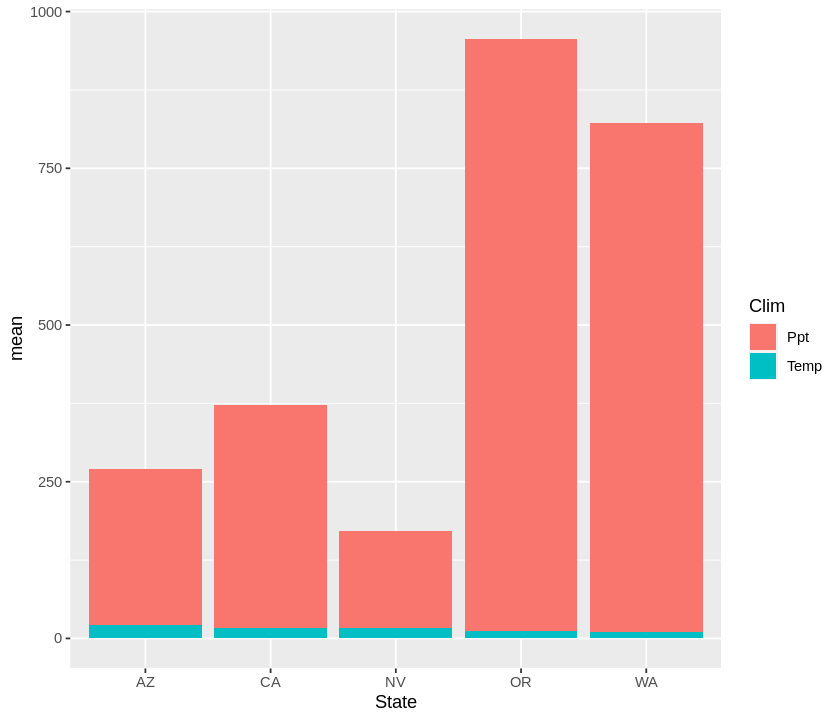

In [45]:
ggplot(data=city_sum_df,aes(x=State,y=mean,fill=Clim)) +
geom_bar(stat='identity')

**That also didnt work. We need to tell ggplot exactly where we want them to be**

We will do this with *position()*

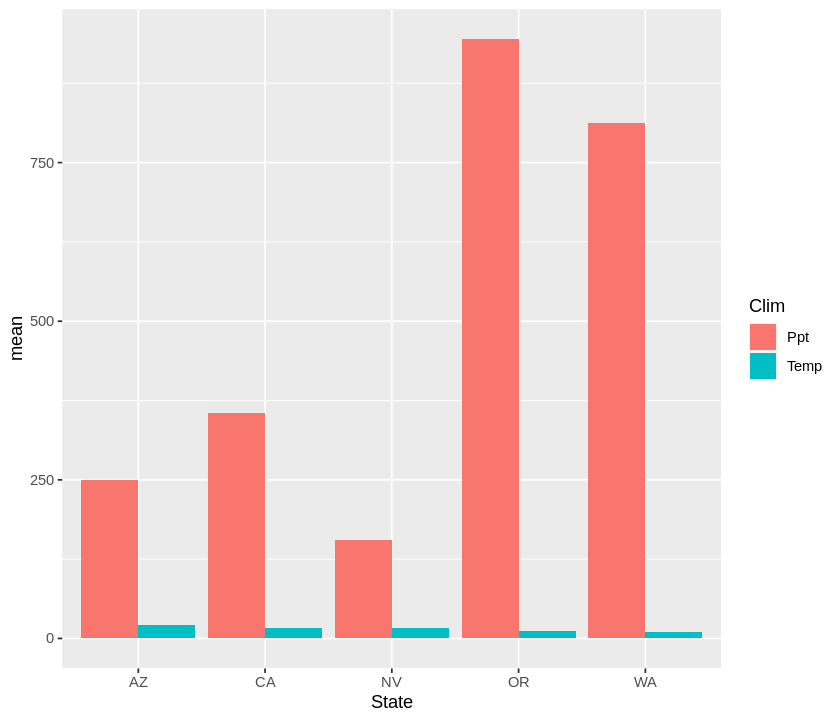

In [48]:
ggplot(data=city_sum_df,aes(x=State,y=mean,fill=Clim)) +
geom_bar(stat='identity',position='dodge')

**Let's use *facet_wrap()* instead to get a better look at the comparisons among states**

**options:**
- **nrow:** number of rows
- **ncol:** number of columns
- **scales='free':** different y scales for each panel (be careful... can be misleading)

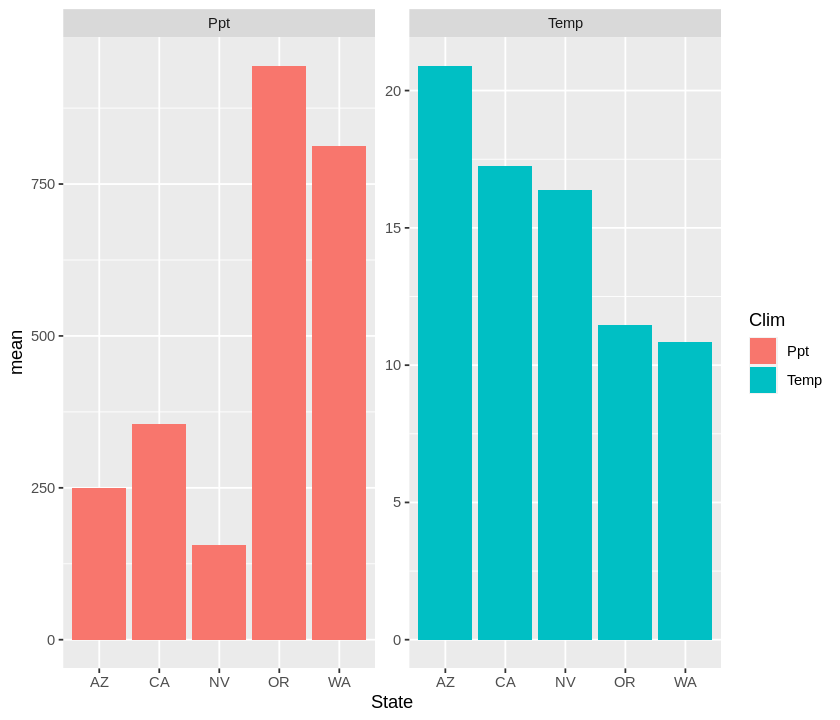

In [51]:
ggplot(data=city_sum_df,aes(x=State,y=mean,fill=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') + 
geom_bar(stat='identity')

**Add errorbars manually**

What would we want errorbars to be to effectively show differences? (sd, se, or 95% CI)

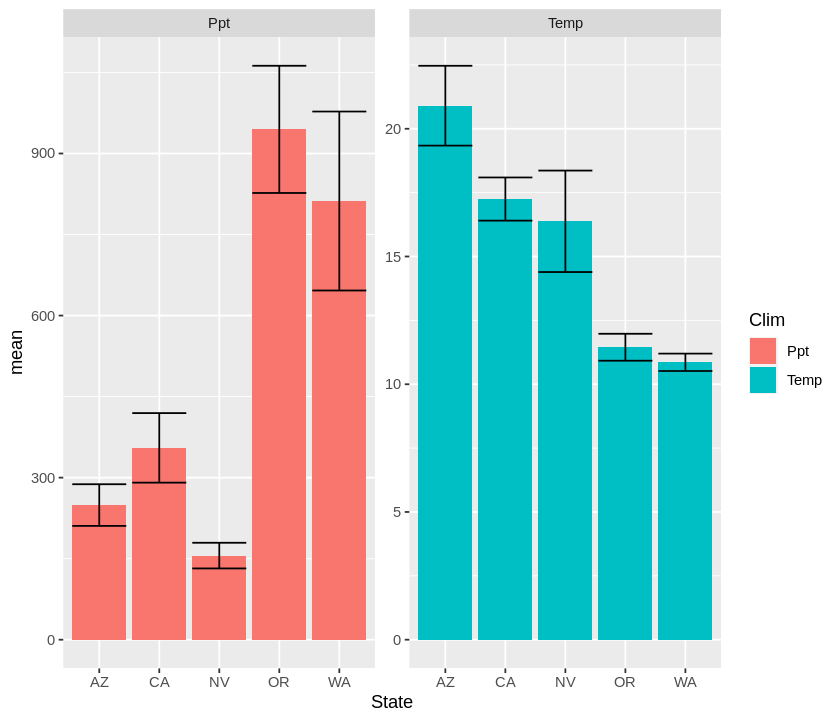

In [74]:
ggplot(data=city_sum_df,aes(x=State,y=mean,fill=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') + 
geom_bar(stat='identity') +
geom_errorbar(aes(ymin = mean - ci, ymax = mean + ci))

**Use points instead of bars** 

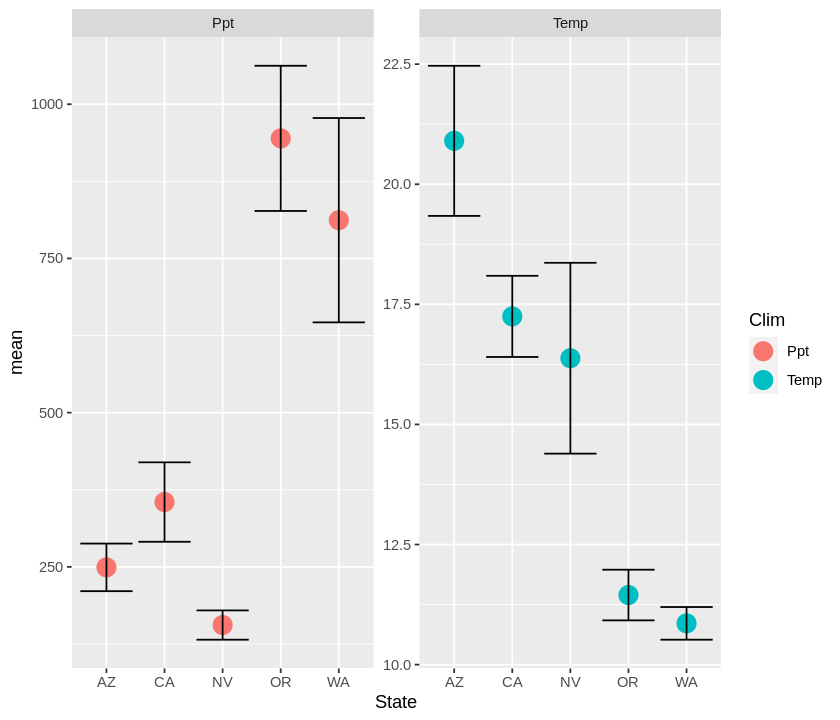

In [79]:
ggplot(data=city_sum_df,aes(x=State,y=mean,colour=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') + 
geom_point(size=5) + 
geom_errorbar(aes(ymin = mean - ci, ymax = mean + ci),colour='black')

### That is a henious way to summarize the data

Let's use some different built in functions within ggplot to summarize for you

**first lets make Ppt and Temp long formatted**

In [105]:
city_long_df <- city_df %>% 
  gather(key=Clim,value=mean,c(Ppt,Temp))

**make the exact bar and error plot with *stat_summary()***

There's many different fun or fun.data in stat_summary(). Here we are using mean and mean_cl_boot. Mean_cl_boot is part of library(Hmisc) and is a bootstrapped 95% confidence interval. 

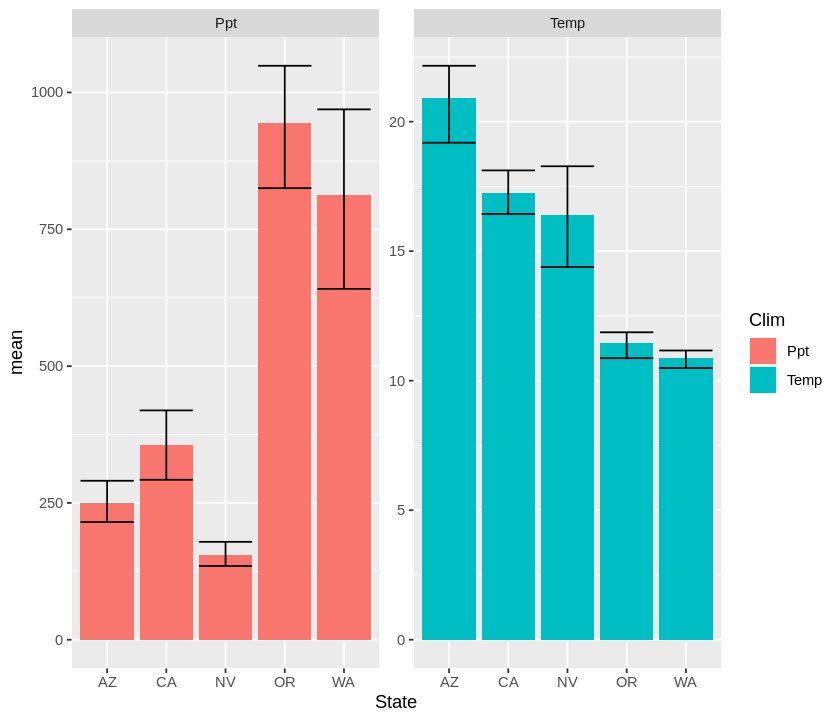

In [123]:
ggplot(data=city_long_df,aes(x=State,y=mean,fill=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
stat_summary(fun = mean, geom = "bar") +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black')

**make the exact point and error plot with *stat_summary()***

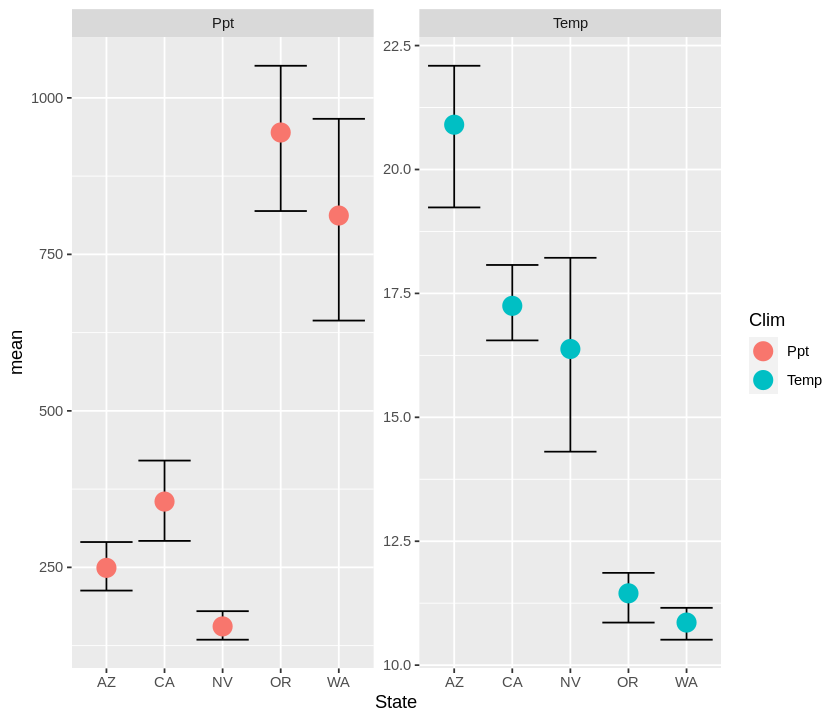

In [122]:
ggplot(data=city_long_df,aes(x=State,y=mean,colour=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black') + 
stat_summary(fun = mean, geom = "point",size=5) 

### While this is easier and ggplot does a lot of work for you, still doesn't show the full data

Let's make box plots and violin

**Make a boxplot**

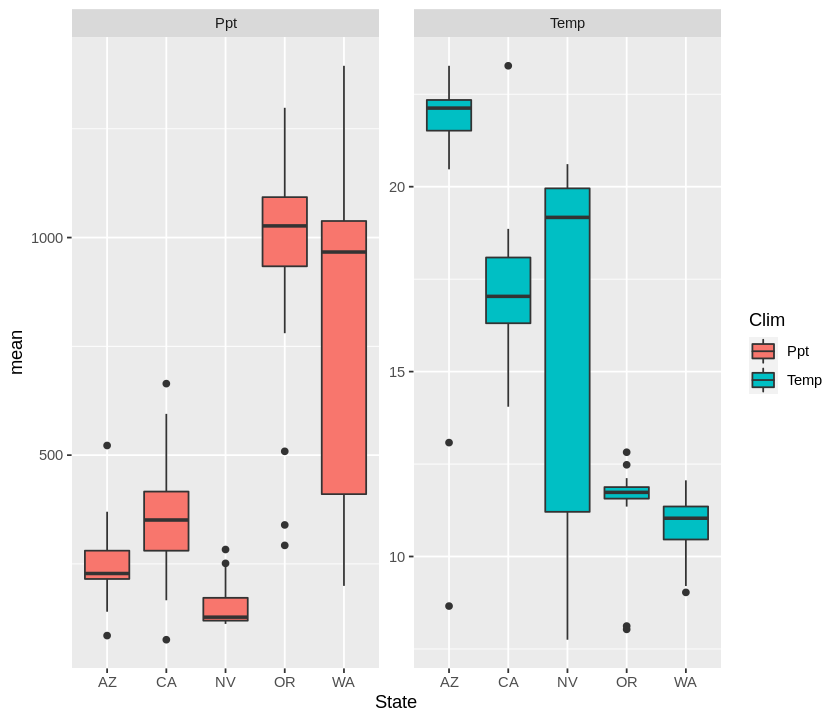

In [112]:
ggplot(data=city_long_df,aes(x=State,y=mean,fill=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
geom_boxplot()

**make violin plot**

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”


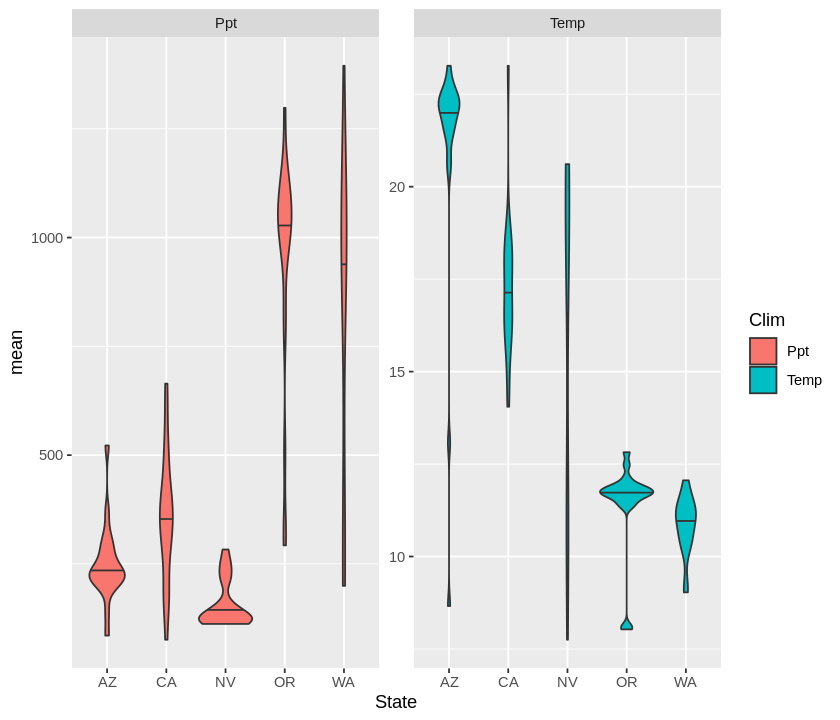

In [115]:
ggplot(data=city_long_df,aes(x=State,y=mean,fill=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
geom_violin(draw_quantiles = 0.5)

### Now let's show the raw data with points and mean and confidence interval

Just layer points then summary stats

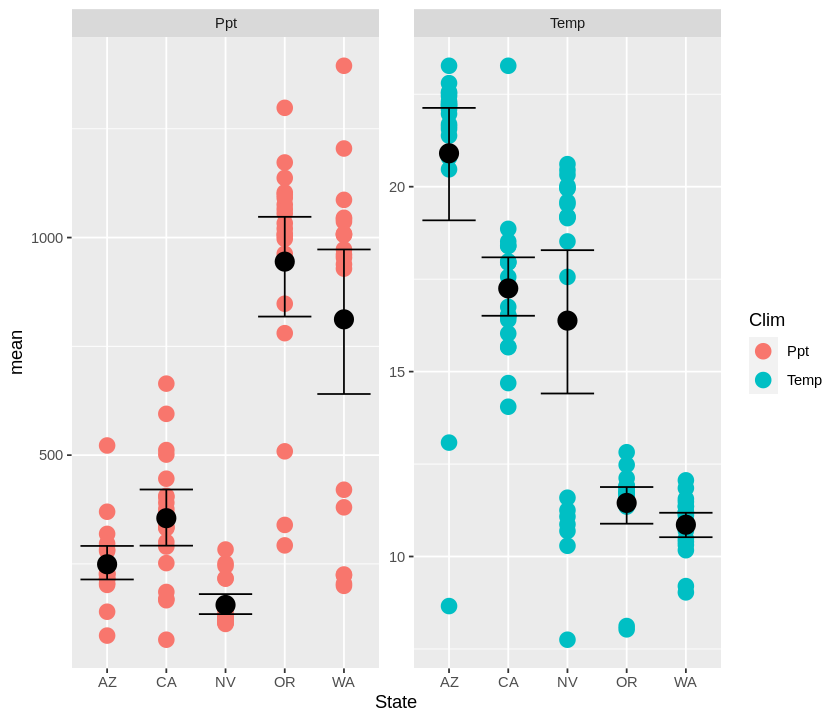

In [121]:
ggplot(data=city_long_df,aes(x=State,y=mean,colour=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
geom_point(size=4) +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black') + 
stat_summary(fun = mean, geom = "point",size=5,colour='black') 

**same figure but little bit nicer**

Use geom_sina() in library(ggforce) for a violin plot style shape for raw ponts. This looks better with the more data you have. 

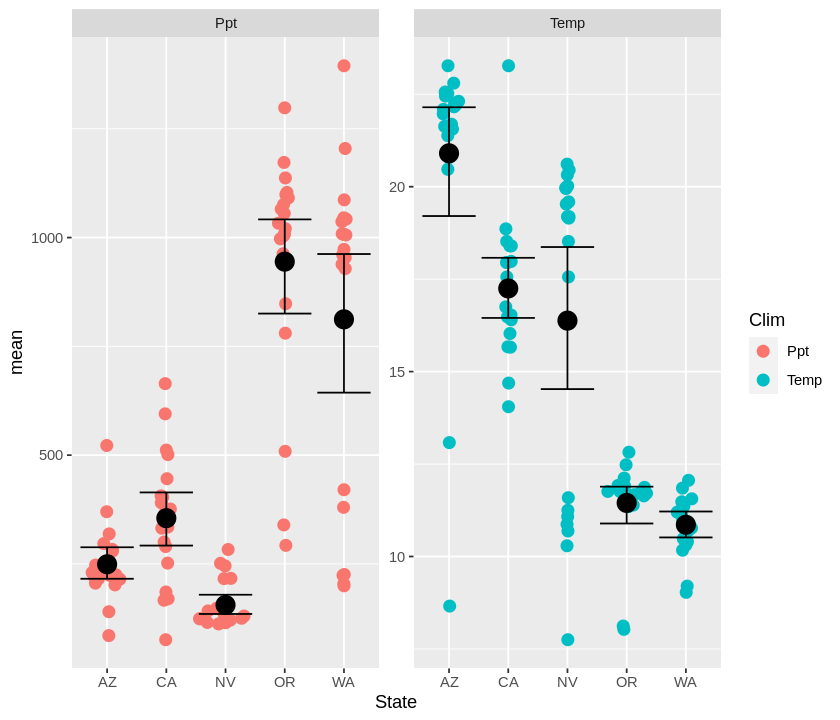

In [126]:
ggplot(data=city_long_df,aes(x=State,y=mean,colour=Clim)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
geom_sina(size=3) +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black') + 
stat_summary(fun = mean, geom = "point",size=5,colour='black') 

## Customizing your figure to look nicer (aka tell a better story)

Honestly, base ggplot is pretty hidieous but it is fast and has a bunch of customizable features. We already learned about about size, shape, colour, and fill. Let's get more in depth with that.

**Things covered:**  
- change factor label and order
- add x, y axis labels and title
- colour vs fill, different kinds of points 
- limits 
- scale 
- theme

### Changing the factors to have different name

Start with a scatter plot of Temp vs Ppt and change State names and order

**Components of factor:**
- **levels:** order but must use exact character as listed
- **labels:** new names in order of levels

In [127]:
city_df$State

[1] OR OR OR OR OR OR OR OR OR OR OR OR OR OR OR OR OR OR OR OR NV NV NV NV NV
 [26] NV NV NV NV NV NV NV NV NV NV NV NV NV NV NV WA WA WA WA WA WA WA WA WA WA
 [51] WA WA WA WA WA WA WA WA WA WA CA CA CA CA CA CA CA CA CA CA CA CA CA CA CA
 [76] CA CA CA CA CA AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ AZ
Levels: AZ CA NV OR WA

If you don't want to change the variable in the data frame, you can create a new one or just change the factor in the ggplot code

In [134]:
city_df$State_name <- factor(city_df$State,levels=c('WA','OR','CA','NV','AZ'),
       labels=c('Washington','Oregon','California','Nevada','Arizona'))

`geom_smooth()` using formula 'y ~ x'



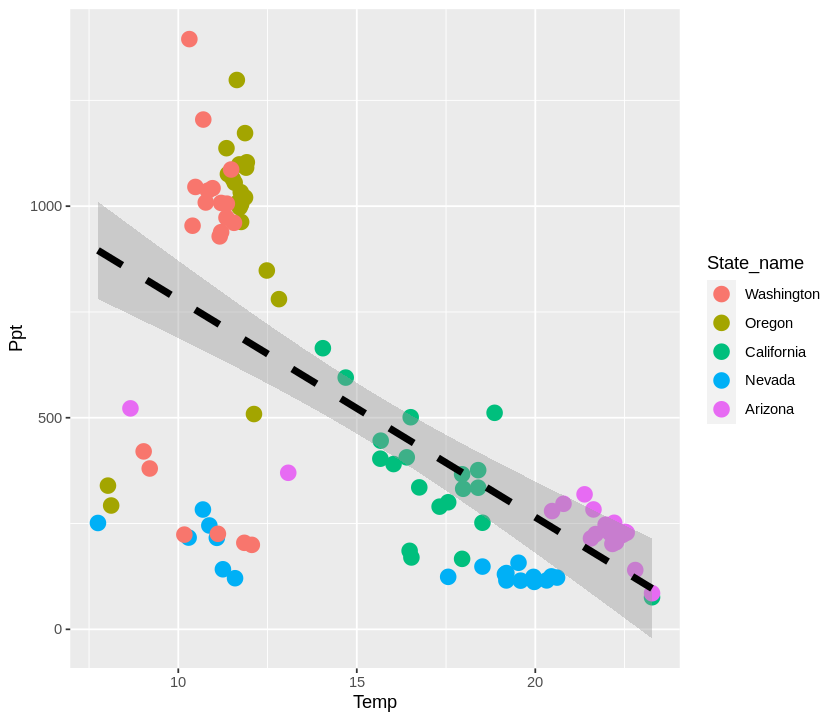

In [136]:
ggplot(data=city_df,aes(x=Temp,y=Ppt)) + 
geom_point(aes(colour=State_name),size=4) + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2)

**use xlab(), ylab(), and ggtitle() to change labels and title**

`geom_smooth()` using formula 'y ~ x'



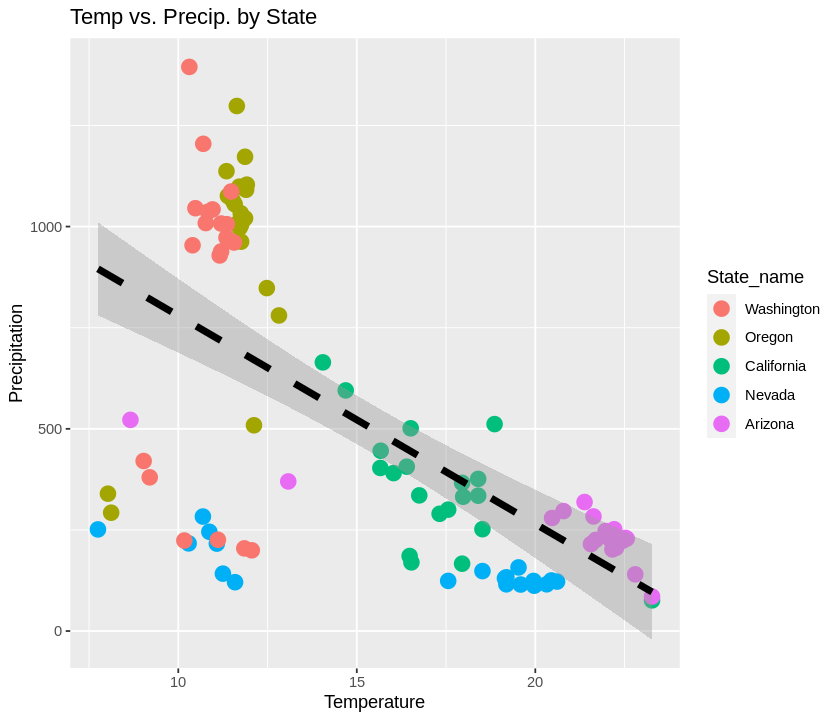

In [141]:
ggplot(data=city_df,aes(x=Temp,y=Ppt)) + 
geom_point(aes(colour=State_name),size=4) + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2) + 
xlab('Temperature') + ylab('Precipitation') + 
ggtitle('Temp vs. Precip. by State')

**colour vs. fill**

Colour or color (ggplot recognizes both): points, lines, text, borders
Fill: Anything with area

Points can by filled if you set the point to be empty using *pch* values 21-25  
Point styles are changed using *pch*, see shapes here (http://www.sthda.com/english/wiki/ggplot2-point-shapes)

**Use fill to fill empty cirlce and colour for the outline**

`geom_smooth()` using formula 'y ~ x'



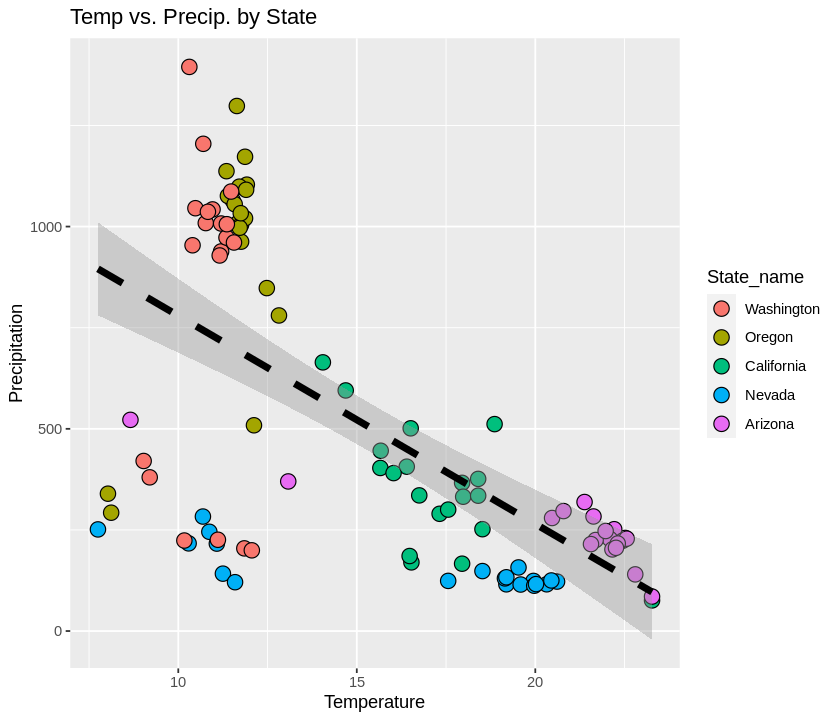

In [142]:
ggplot(data=city_df,aes(x=Temp,y=Ppt)) + 
geom_point(aes(fill=State_name),size=4,pch=21,colour='black') + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2) + 
xlab('Temperature') + ylab('Precipitation') + 
ggtitle('Temp vs. Precip. by State')

### scale can be used to set colours, fill, shape, legends, axis limits, etc. 

There are hundreds of options but they are pretty intuitive and if you have an issue, someone else has as well. Google is your best friend. 

We are just going go through a couple scales.

**colour vs fill**

**color selection is really important in figures, Jahner will cover this next week*8
- scale_fill_manual()
- scale_colour_manual()
- scale_fill_npg() (I personally like this color palette for up to 10 discrete variables


commands include:
- name: Legend title
- values: color codes (accepts hexcodes or colorbrewer label color)

**shape**
- scale_shape_manual()

commands include:
- name: Legend title
- values: pch codes

**axis breaks and limits, discrete/continuous variables**
- scale_x_continuous()
- scale_y_continuous() 

commands include:
- name: axis title
- breaks: axis tick breaks
- label: axis break labels
- limits: axis limits
- positon: axis position
- expand: axis adjustment of margins

### All in one figure, change the following in the Temp vs. Precip, coloured by State** 
- **change fill colours manually**
- **change shape of each state**  
- **change axes labels,limits,breaks. Make x axis on the top**

This isn't a great looking figure but just showing what you can do with scale

`geom_smooth()` using formula 'y ~ x'



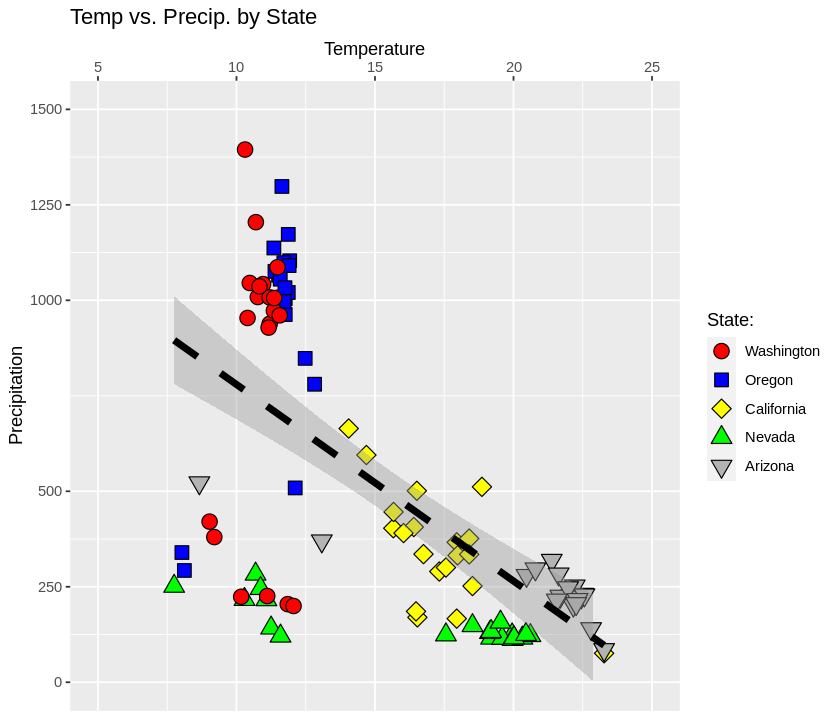

In [155]:
ggplot(data=city_df,aes(x=Temp,y=Ppt)) + 
geom_point(aes(fill=State_name,shape=State_name),size=4,colour='black') + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2) + 
ggtitle('Temp vs. Precip. by State') + 
scale_fill_manual(name='State:',values=c('red','blue','yellow','green','grey70')) + 
scale_shape_manual(name='State:',values=c(21,22,23,24,25)) + 
scale_x_continuous(name='Temperature',limits=c(5,25),breaks=c(5,10,15,20,25),position = 'top') + 
scale_y_continuous(name='Precipitation',limits=c(0,1500),breaks=c(0,250,500,1000,1250,1500)) 

### Theme: changing figure layout

This is how you get even more customizable with your figure layout. *theme()* has many many options and even some basic premade layouts. Most of the options can change the position, size, font, face, color, etc. of about anything to do with the basic layout of the figure

**Standard themes**
https://ggplot2.tidyverse.org/reference/ggtheme.html

just two are:
- theme_bw()
- theme_classic()


`geom_smooth()` using formula 'y ~ x'



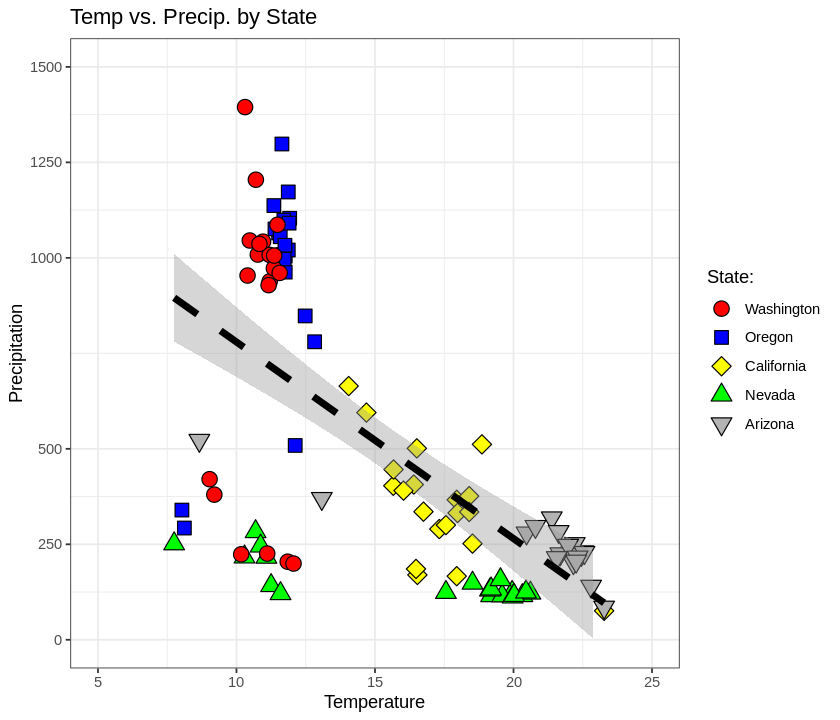

In [156]:
ggplot(data=city_df,aes(x=Temp,y=Ppt)) + 
geom_point(aes(fill=State_name,shape=State_name),size=4,colour='black') + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2) + 
ggtitle('Temp vs. Precip. by State') + 
scale_fill_manual(name='State:',values=c('red','blue','yellow','green','grey70')) + 
scale_shape_manual(name='State:',values=c(21,22,23,24,25)) + 
scale_x_continuous(name='Temperature',limits=c(5,25),breaks=c(5,10,15,20,25)) + 
scale_y_continuous(name='Precipitation',limits=c(0,1500),breaks=c(0,250,500,1000,1250,1500)) + 
theme_bw()

`geom_smooth()` using formula 'y ~ x'



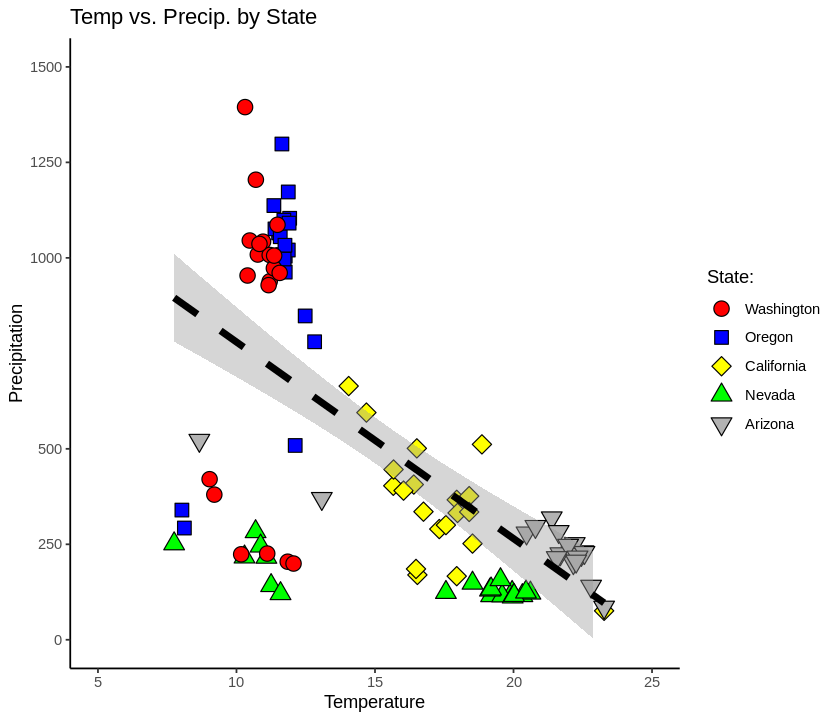

In [168]:
ggplot(data=city_df,aes(x=Temp,y=Ppt)) + 
geom_point(aes(fill=State_name,shape=State_name),size=4,colour='black') + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2) + 
ggtitle('Temp vs. Precip. by State') + 
scale_fill_manual(name='State:',values=c('red','blue','yellow','green','grey70')) + 
scale_shape_manual(name='State:',values=c(21,22,23,24,25)) + 
scale_x_continuous(name='Temperature',limits=c(5,25),breaks=c(5,10,15,20,25)) + 
scale_y_continuous(name='Precipitation',limits=c(0,1500),breaks=c(0,250,500,1000,1250,1500)) + 
theme_classic()

## More theme settings 

**There are two basic need-to-know commands in theme:**
- **element_blank():** removes that element
- **element_text():** edits text

Within *element_text()*, there are many things that can be adjusted that are the same throughout theme and other elements of ggplot:

- family = (font, default is Arial)
- face = (bold, italic, narrow
- colour = 
- size = (same as in word. Will come in handy if need to use external editor to add text)
- hjust = (horizontal adjust)
- vjust = (vertical adjust)
- angle = (text angle, 90 is vertical)


**Elements within theme that are commonly adjusted with *element_text():**
- axis.text
- axis.title
- axis.title.x
- axis.title.y
- axis.ticks
- plot.title
- legend.title
- legend.text 

**Other common adjustments:**
- panel.grid
- panel.grid.major
- panel.grid.minor
- panel.border
- panel.spacing
- legend.position


Again, anything you want to know someone else has asked online. Google is your best friend


**here is a theme I commonly use and just adjust as need be**  
I suggust playing with the theme and just seeing what happens

`geom_smooth()` using formula 'y ~ x'



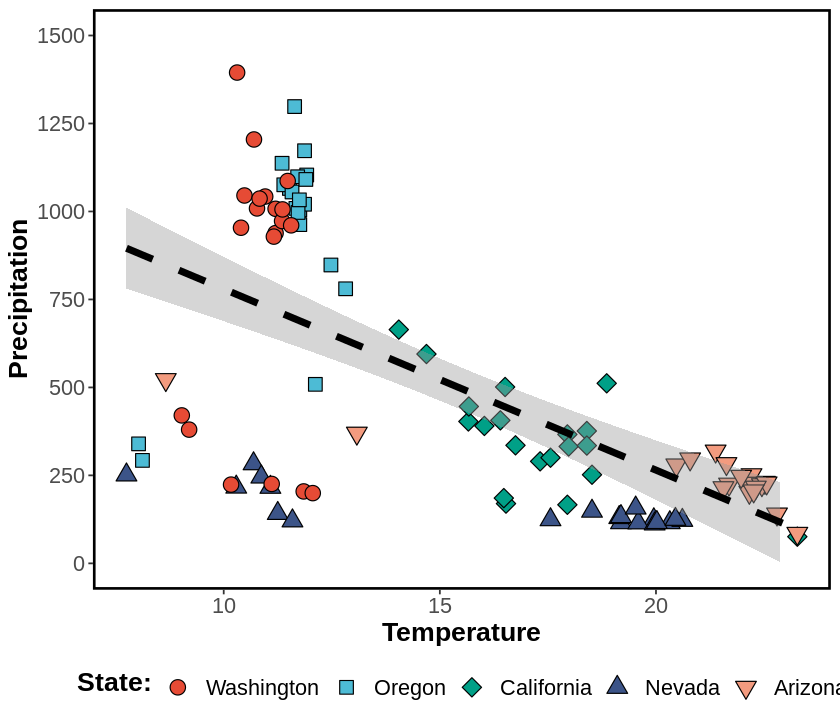

In [170]:
ggplot(data=city_df,aes(x=Temp,y=Ppt)) + 
geom_point(aes(fill=State_name,shape=State_name),size=4,colour='black') + 
stat_smooth(method='lm',linetype='dashed',colour='black',size=2) + 
#ggtitle('Temp vs. Precip. by State') + #titles always kinda look bad
scale_fill_npg(name='State:') + 
scale_shape_manual(name='State:',values=c(21,22,23,24,25)) + 
scale_x_continuous(name='Temperature') + 
scale_y_continuous(name='Precipitation',limits=c(0,1500),breaks=c(0,250,500,750,1000,1250,1500)) + 
theme_bw() +
theme(legend.position = 'bottom', 
    plot.title = element_text(size = 20, colour="black",face = "bold"),
    axis.text = element_text(size=13),
    axis.title = element_text(size = 16, colour="black",face = "bold"),
    panel.border = element_rect(size = 1.5, colour = "black"),
    legend.title = element_text(size = 16, colour="black",face = "bold",vjust = 1),
    legend.text = element_text(size=13),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank())

## Patchwork: combining multiple figure patterns 

[(patchwork website)](https://gotellilab.github.io/GotelliLabMeetingHacks/NickGotelli/ggplotPatchwork.html)

the easiest way to combine figures is with *library(patchwork)*

Another great function is *ggarrange()* in the package *ggpubr*, more customizable = harder to use. 

**first we need to make and assign figures to patch together**

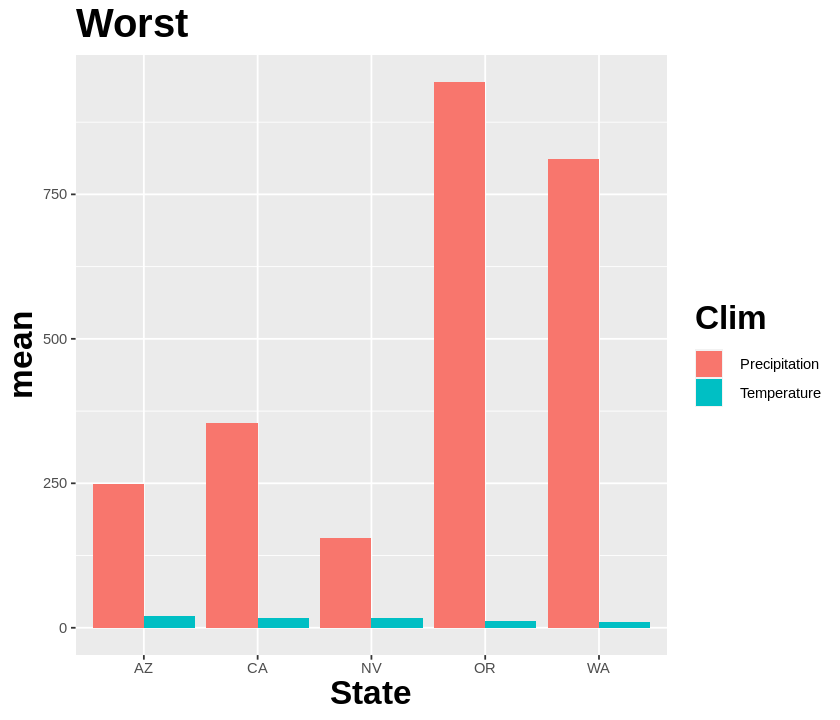

In [189]:
worst_plot <- ggplot(data=city_sum_df,aes(x=State,y=mean,fill=Clim)) +
geom_bar(stat='identity',position='dodge') + 
ggtitle('Worst') + 
theme(title = element_text(size = 20, colour="black",face = "bold"))
worst_plot

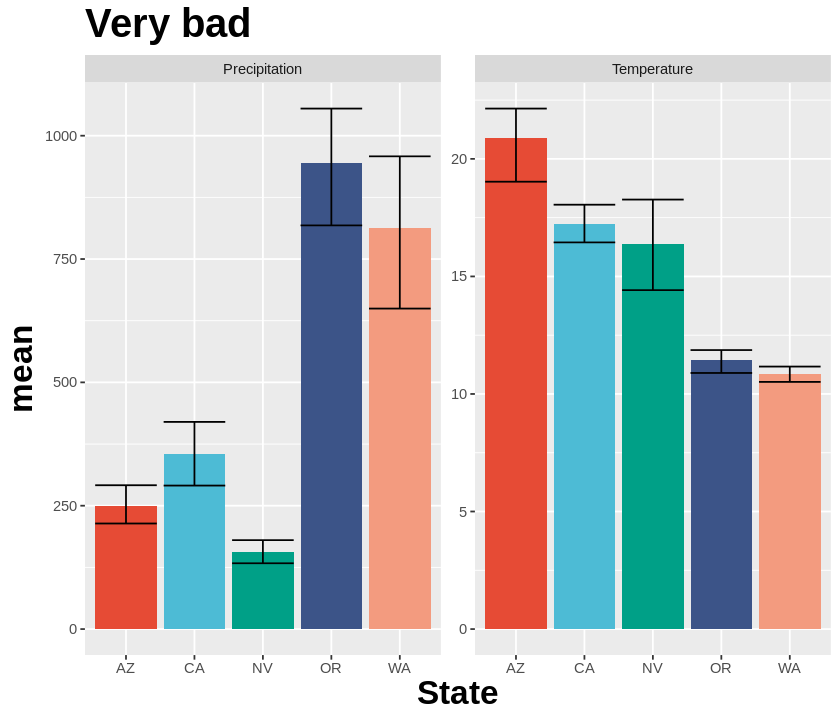

In [190]:
very_bad_plot <- ggplot(data=city_long_df,aes(x=State,y=mean,fill=State)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
stat_summary(fun = mean, geom = "bar") +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black') + 
scale_fill_npg() + 
ggtitle('Very bad') + 
theme(legend.position='none',
    title = element_text(size = 20, colour="black",face = "bold"))
very_bad_plot

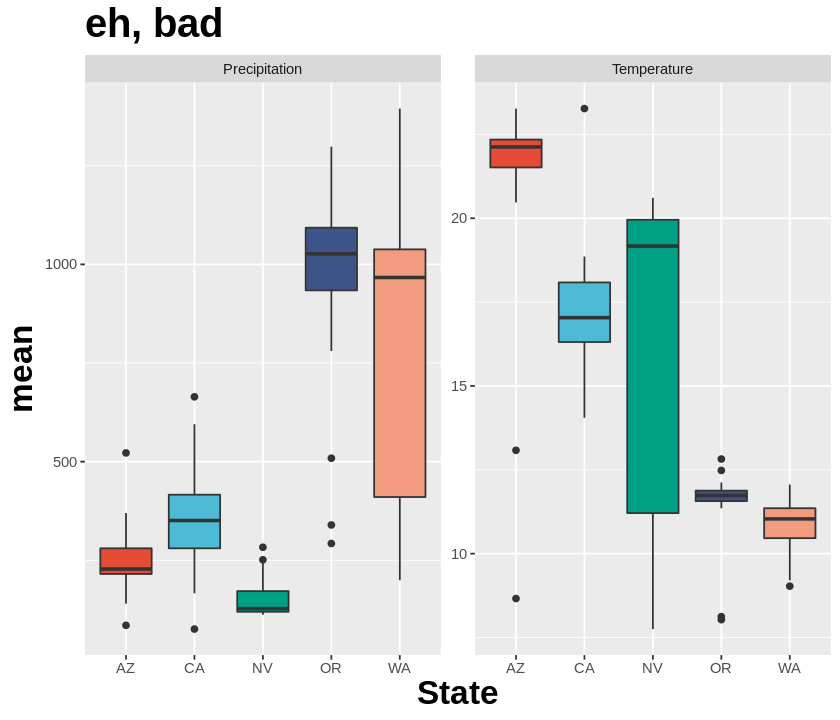

In [191]:
bad_plot <- ggplot(data=city_long_df,aes(x=State,y=mean,fill=State)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
geom_boxplot() + 
scale_fill_npg() + 
ggtitle('eh, bad') + 
theme(legend.position='none',
    title = element_text(size = 20, colour="black",face = "bold"))
bad_plot

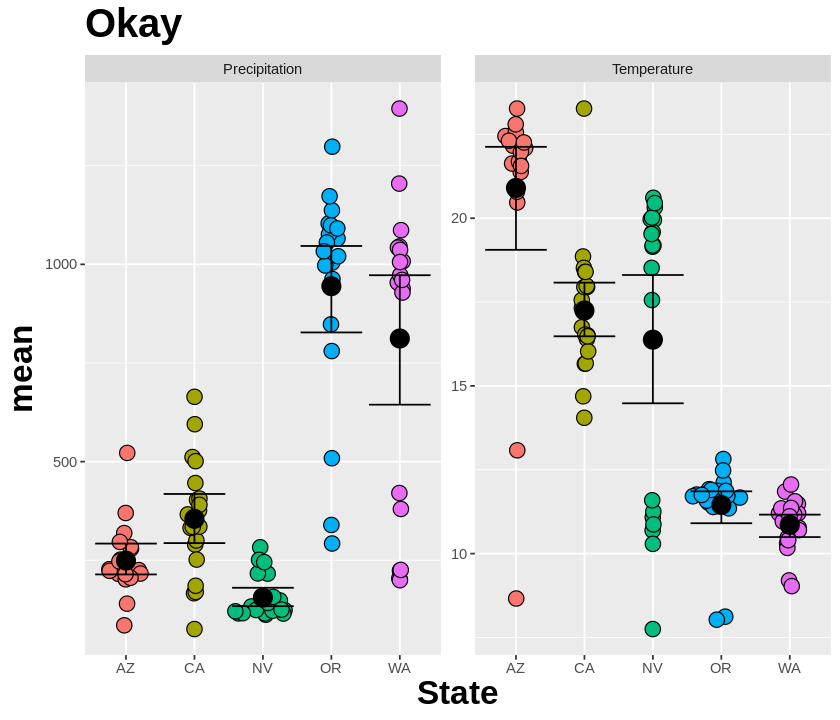

In [192]:
okay_plot <- ggplot(data=city_long_df,aes(x=State,y=mean,,fill=State)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
geom_sina(size=4,pch=21) +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black') + 
stat_summary(fun = mean, geom = "point",size=5,colour='black') +
ggtitle('Okay') + 
theme(legend.position='none',
    title = element_text(size = 20, colour="black",face = "bold"))
okay_plot

**Patchwork: 2 rows and 2 colums**

In [194]:
#library(repr)

In [236]:
options(repr.plot.width = 18, repr.plot.height = 10, repr.plot.res = 100)

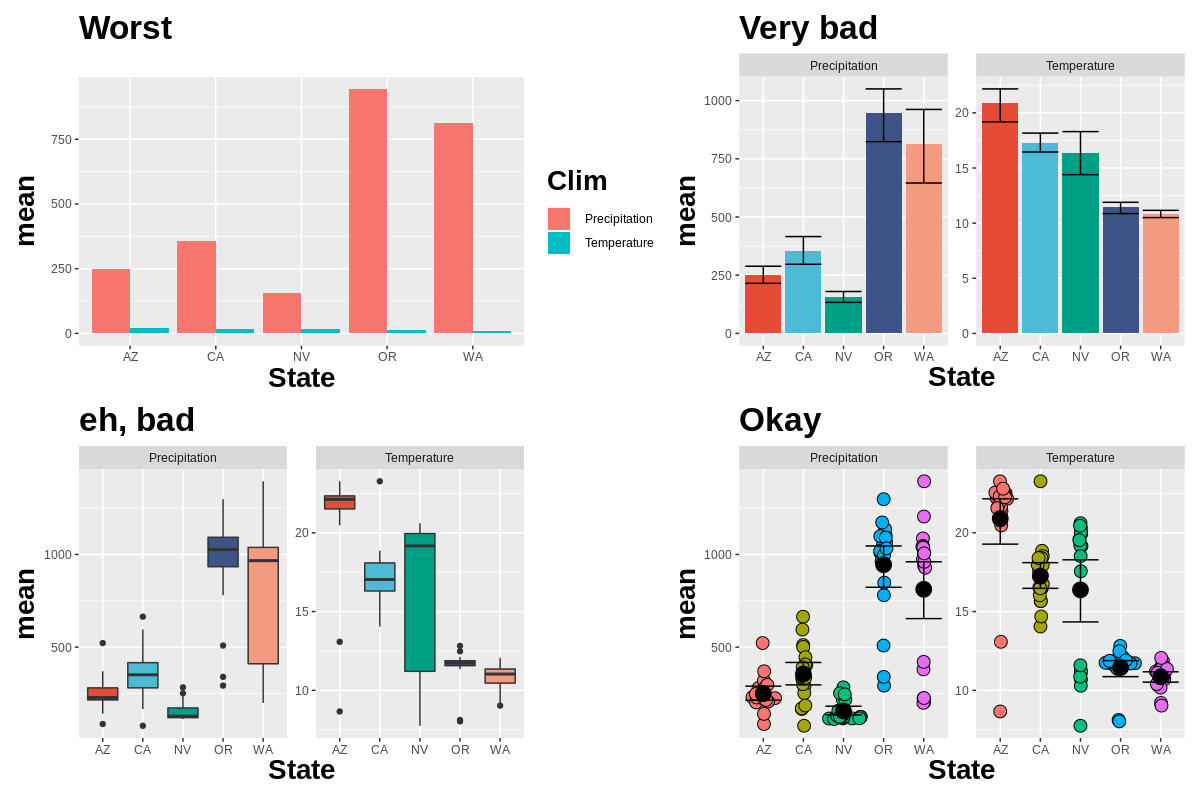

In [200]:
worst_plot + very_bad_plot + bad_plot + okay_plot + plot_layout(ncol=2,nrow=2)

**patchwork: 2 col, 1 row**

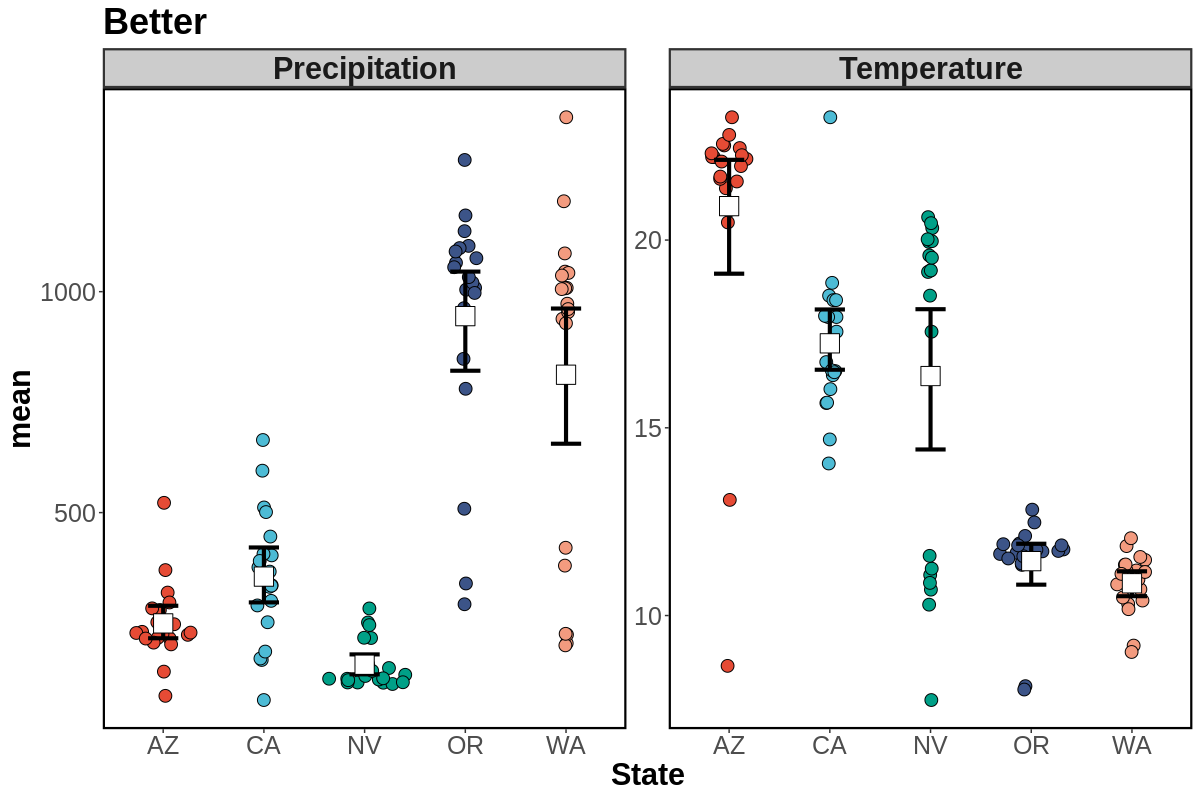

In [218]:
better_plot <- ggplot(data=city_long_df,aes(x=State,y=mean,,fill=State)) +
facet_wrap(~Clim,nrow=1,scales = 'free') +
geom_sina(size=4,pch=21) +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black',width = 0.3,size=1.4) + 
stat_summary(fun = mean, geom = "point",size=7,colour='black',pch=22,fill='white') +
scale_fill_npg() + 
ggtitle('Better') + 
theme_bw() +
theme(legend.position = 'None', 
    plot.title = element_text(size = 26, colour="black",face = "bold"),
    axis.text = element_text(size=18),
    axis.title = element_text(size = 22, colour="black",face = "bold"),
    panel.border = element_rect(size = 1.5, colour = "black"),
    legend.title = element_text(size = 22, colour="black",face = "bold",vjust = 1),
    legend.text = element_text(size=18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    strip.text.x = element_text(size=22, face="bold"),
    strip.background = element_rect(size=1.5,colour="#333333",fill="#CCCCCC"))
better_plot

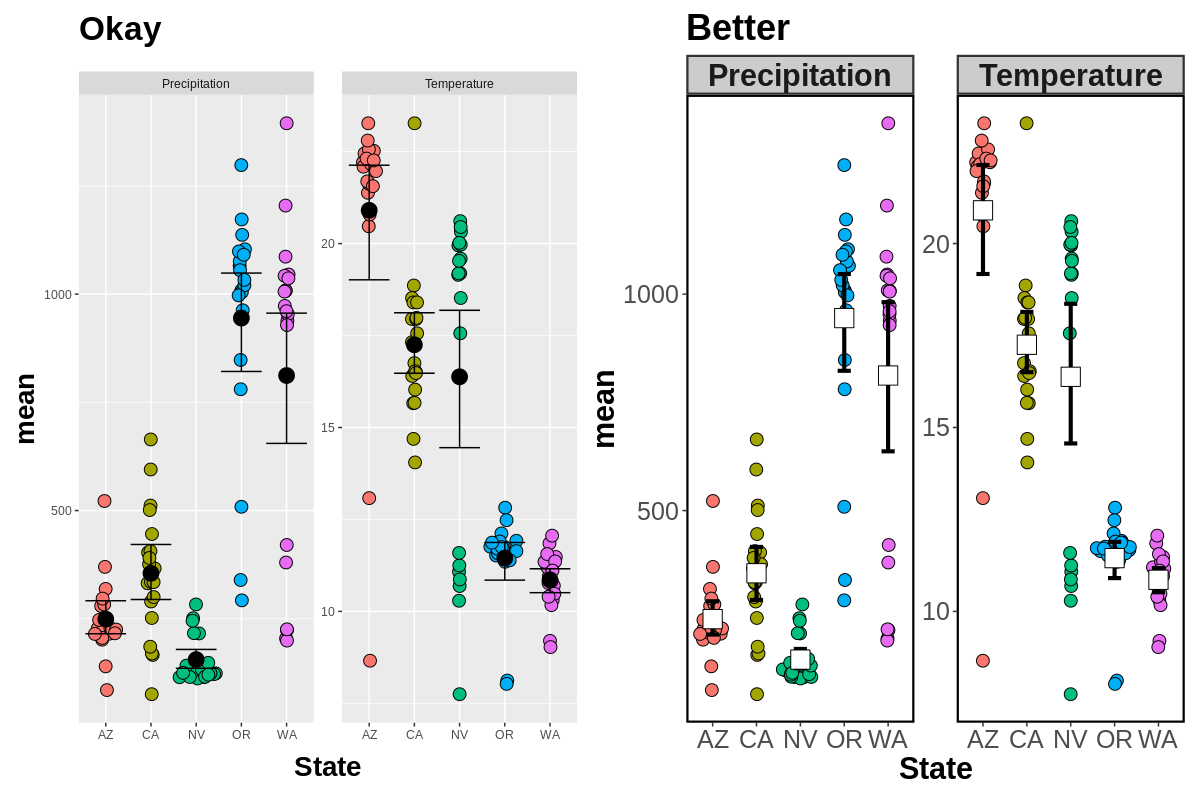

In [213]:
okay_plot + better_plot

### sometimes it takes two figures to make one good plot

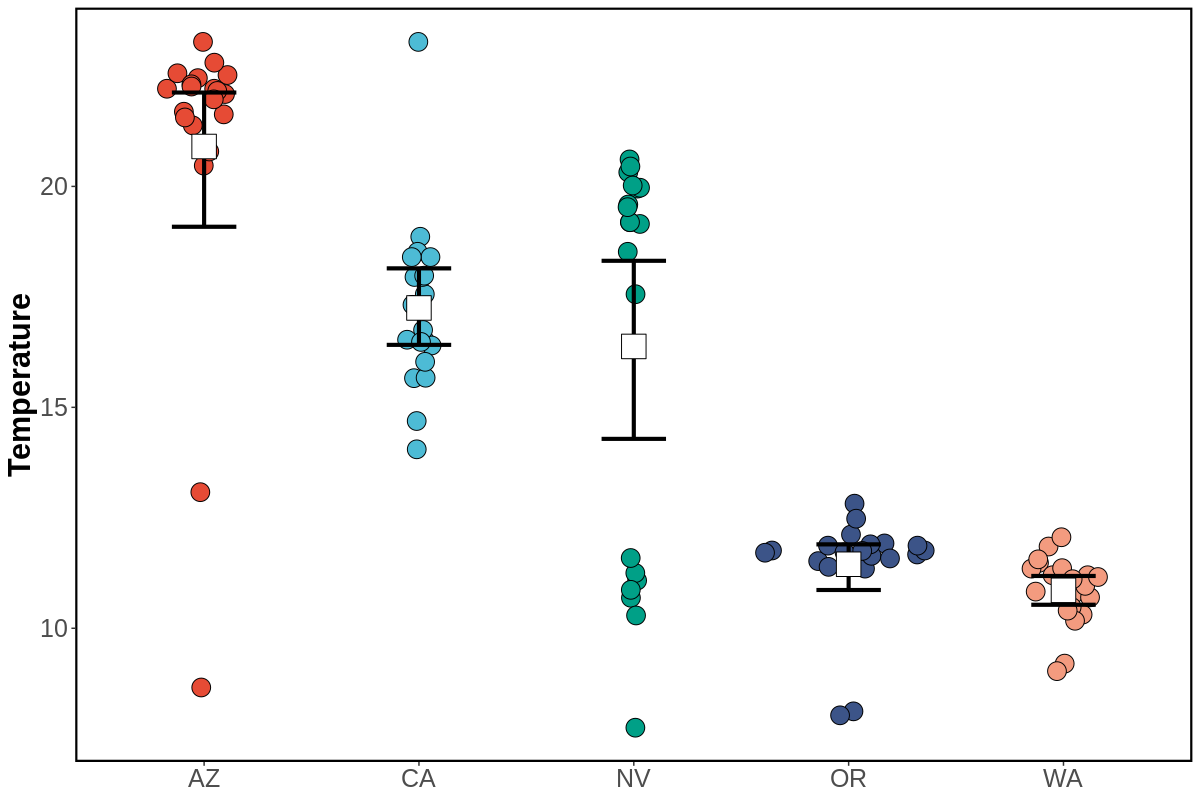

In [230]:
temp_df <- city_long_df[which(city_long_df$Clim == 'Temperature'),]
temp_plot <- ggplot(data=temp_df,aes(x=State,y=mean,,fill=State)) +
geom_sina(size=6,pch=21,colour='black') +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black',width = 0.3,size=1.4) + 
stat_summary(fun = mean, geom = "point",size=9,colour='black',pch=22,fill='white') +
scale_fill_npg() + 
ylab('Temperature') + 
theme_bw() +
theme(legend.position = 'None', 
    plot.title = element_text(size = 26, colour="black",face = "bold"),
    axis.text = element_text(size=18),
    axis.title = element_text(size = 22, colour="black",face = "bold"),
    axis.title.x = element_blank(),
    panel.border = element_rect(size = 1.5, colour = "black"),
    legend.title = element_text(size = 22, colour="black",face = "bold",vjust = 1),
    legend.text = element_text(size=18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank())
temp_plot

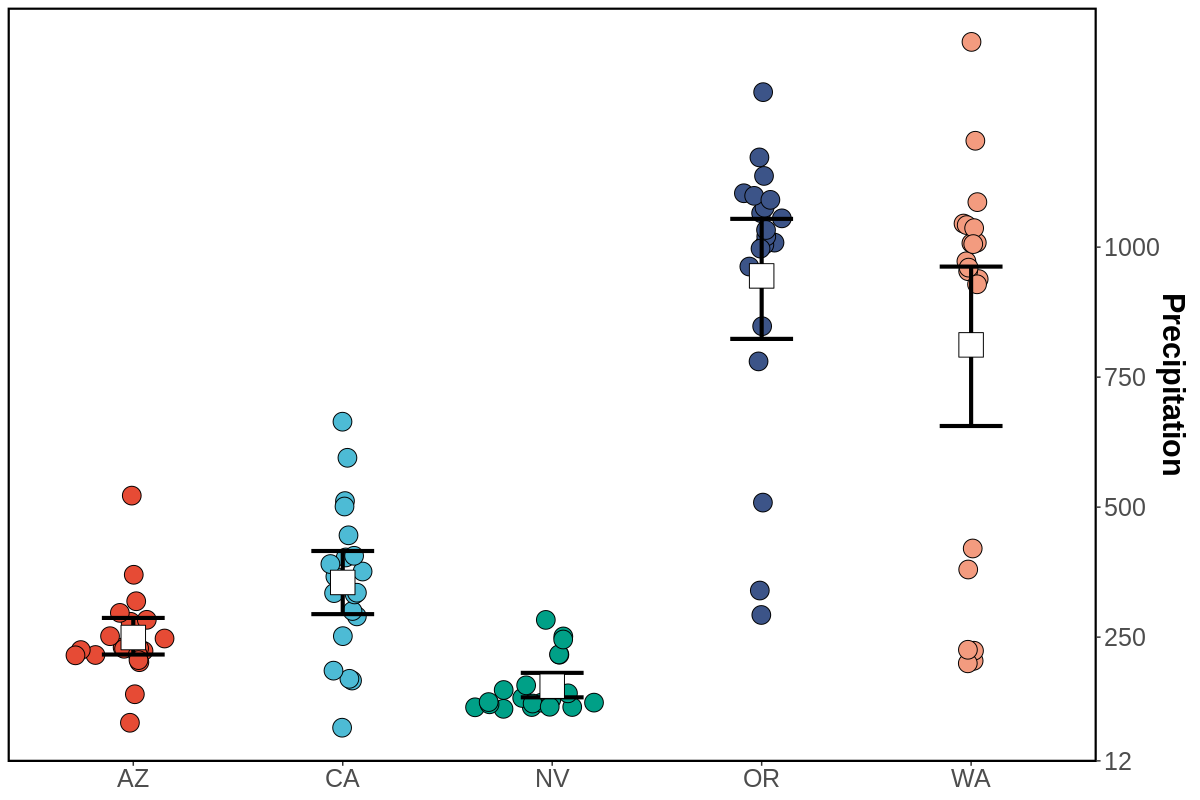

In [231]:
ppt_df <- city_long_df[which(city_long_df$Clim == 'Precipitation'),]
ppt_plot <- ggplot(data=ppt_df,aes(x=State,y=mean,,fill=State)) +
geom_sina(size=6,pch=21,colour='black') +
stat_summary(fun.data = mean_cl_boot, geom = "errorbar",color='black',width = 0.3,size=1.4) + 
stat_summary(fun = mean, geom = "point",size=9,colour='black',pch=22,fill='white') +
scale_fill_npg() + 
scale_y_continuous(name='Precipitation',position='right',breaks=c(250,500,750,1000,12)) + 
theme_bw() +
theme(legend.position = 'None', 
    plot.title = element_text(size = 26, colour="black",face = "bold"),
    axis.text = element_text(size=18),
    axis.title = element_text(size = 22, colour="black",face = "bold"),
    axis.title.x = element_blank(),
    panel.border = element_rect(size = 1.5, colour = "black"),
    legend.title = element_text(size = 22, colour="black",face = "bold",vjust = 1),
    legend.text = element_text(size=18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank())
ppt_plot

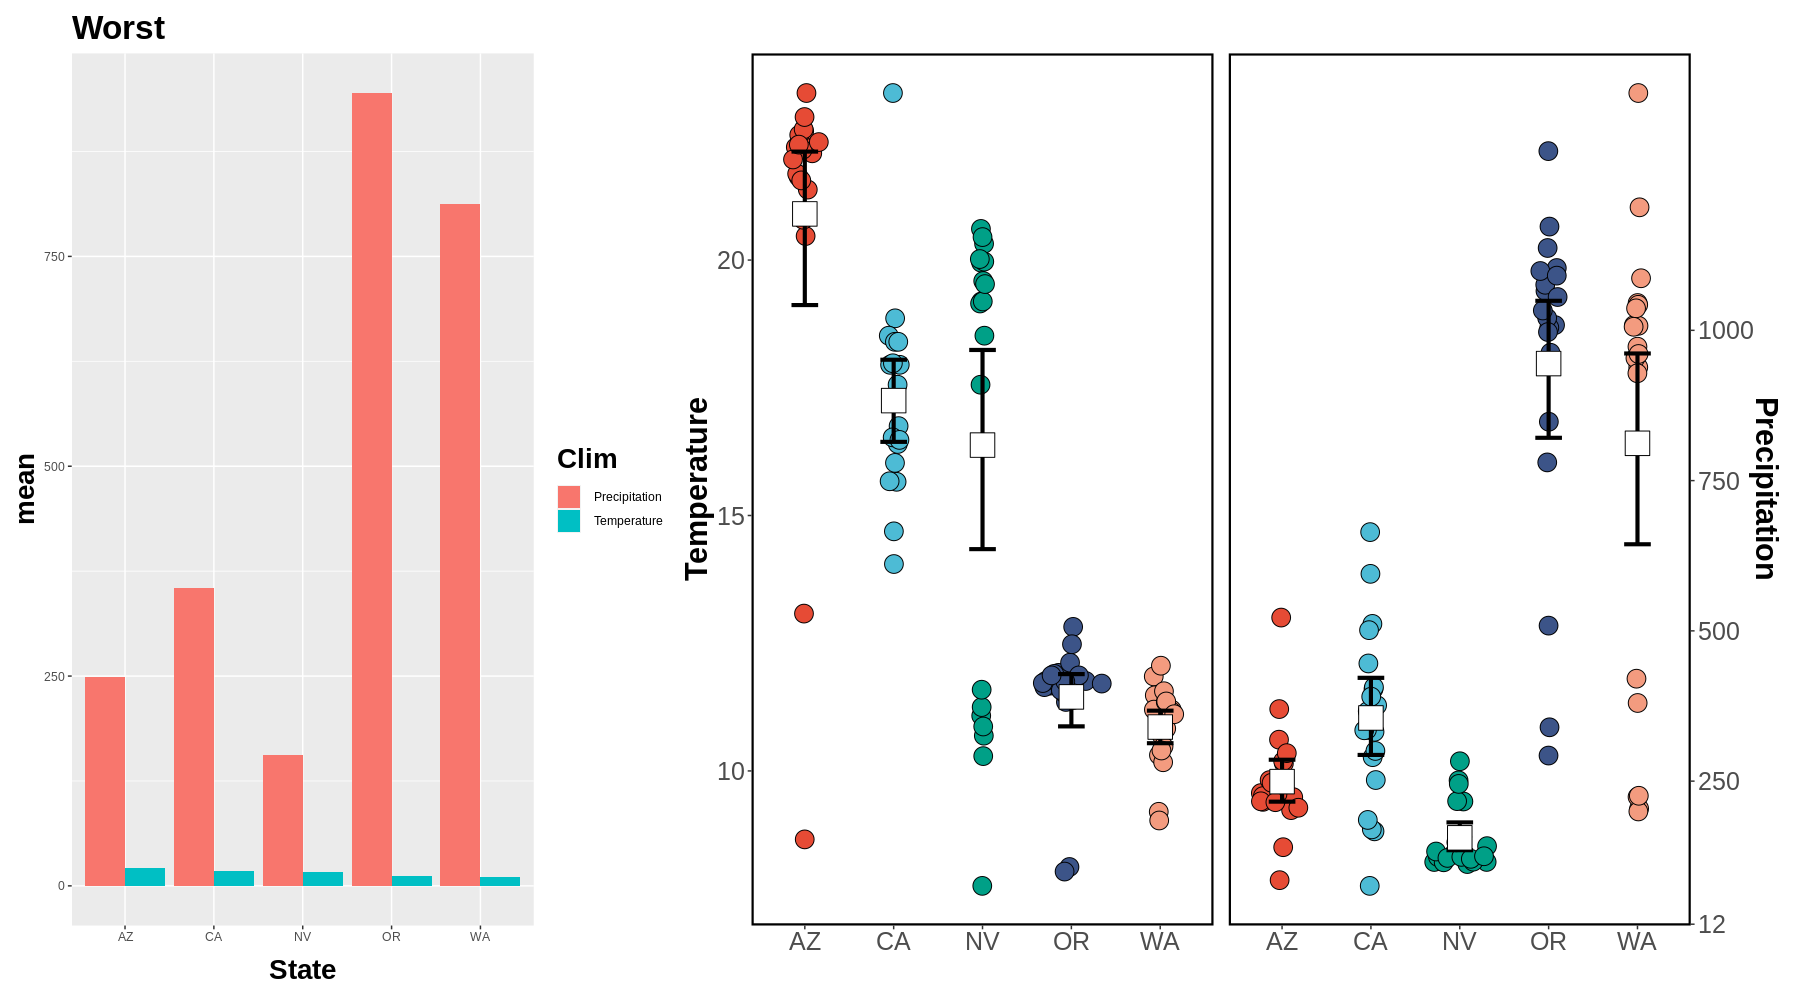

In [237]:
worst_plot + temp_plot + ppt_plot